# 서울경기 종관기상관측
데이터 링크 : https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36&tabNo=1

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')

pd.set_option('display.max_rows',None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
cd /content/drive/MyDrive/일일 데이터 분석/

/content/drive/MyDrive/일일 데이터 분석


In [4]:
data = pd.read_csv('./서울경기 종관기상관측(2018~2022).csv',encoding='cp949')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   지점                   10956 non-null  int64  
 1   지점명                  10956 non-null  object 
 2   일시                   10956 non-null  object 
 3   평균기온(°C)             10947 non-null  float64
 4   최저기온(°C)             10954 non-null  float64
 5   최저기온 시각(hhmi)        10954 non-null  float64
 6   최고기온(°C)             10955 non-null  float64
 7   최고기온 시각(hhmi)        10955 non-null  float64
 8   강수 계속시간(hr)          1443 non-null   float64
 9   10분 최다 강수량(mm)       2659 non-null   float64
 10  10분 최다강수량 시각(hhmi)   1818 non-null   float64
 11  1시간 최다강수량(mm)        2661 non-null   float64
 12  1시간 최다 강수량 시각(hhmi)  1938 non-null   float64
 13  일강수량(mm)             3981 non-null   float64
 14  최대 순간 풍속(m/s)        10953 non-null  float64
 15  최대 순간 풍속 풍향(16방위)    10953 non-null 

In [6]:
data.isnull().sum()

지점                         0
지점명                        0
일시                         0
평균기온(°C)                   9
최저기온(°C)                   2
최저기온 시각(hhmi)              2
최고기온(°C)                   1
최고기온 시각(hhmi)              1
강수 계속시간(hr)             9513
10분 최다 강수량(mm)          8297
10분 최다강수량 시각(hhmi)      9138
1시간 최다강수량(mm)           8295
1시간 최다 강수량 시각(hhmi)     9018
일강수량(mm)                6975
최대 순간 풍속(m/s)              3
최대 순간 풍속 풍향(16방위)          3
최대 순간풍속 시각(hhmi)           3
최대 풍속(m/s)                 0
최대 풍속 풍향(16방위)             0
최대 풍속 시각(hhmi)             0
평균 풍속(m/s)                 6
풍정합(100m)                 13
최다풍향(16방위)                11
평균 이슬점온도(°C)              18
최소 상대습도(%)                 0
최소 상대습도 시각(hhmi)           0
평균 상대습도(%)                19
평균 증기압(hPa)               19
평균 현지기압(hPa)              12
최고 해면기압(hPa)               4
최고 해면기압 시각(hhmi)           4
최저 해면기압(hPa)               7
최저 해면기압 시각(hhmi)           4
평균 해면기압(hPa)              14
가조시간(hr)      

In [7]:
data.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,98,동두천,2018-01-01,-3.10,-9.50,809.00,4.60,1325.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98,동두천,2018-01-02,-3.50,-8.60,727.00,3.80,1415.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98,동두천,2018-01-03,-5.40,-9.50,815.00,1.10,1525.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,98,동두천,2018-01-04,-6.10,-11.80,744.00,-0.60,1500.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,98,동두천,2018-01-05,-4.70,-8.50,751.00,2.90,1436.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop columns
# 일 최심신적설(cm), 일 최심신적설 시각(hhmi), 일 최심적설(cm), 일 최심적설 시각(hhmi), 합계 3시간 신적설(cm), 안개 계속시간(hr)

def preprocessing(df):
  col_list = []
  for col in df.columns:
    if '시각' in col:
      col_list.append(col)

  for col in col_list:
    df[col] = df[col].fillna(0)

  df['일시'] = df['일시'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
  df['년'] = df['일시'].map(lambda x: x.year)
  df['월'] = df['일시'].map(lambda x: x.month)
  df['일'] = df['일시'].map(lambda x: x.day)

  df['10분 최다강수량 시각(hhmi)'] = df['10분 최다강수량 시각(hhmi)'].map(lambda x: str(x)[1:] if str(x).startswith('-') else str(x))
  df['1시간 최다 강수량 시각(hhmi)'] = df['1시간 최다 강수량 시각(hhmi)'].map(lambda x: str(x)[1:] if str(x).startswith('-') else str(x))

  df = df.drop(['일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)', '합계 3시간 신적설(cm)', '안개 계속시간(hr)'], axis=1)

  return df

weather = preprocessing(data)

In [ ]:
for col in weather.columns:
  if '시각' in col :
    print(col)
    weather[col] = weather[col].map(lambda x: str(x)[:-2] if len(str(x)[:-2]) == 4 else '0' + str(x)[:-2] if len(str(x)[:-2]) == 3 else '00' + str(x)[:-2] if len(str(x)[:-2]) == 2 else '000' + str(x)[:-2])
    weather[col] = weather[col].map(lambda x: x[:-2] + ':' + str(x)[-2:])
    weather[col] = weather[col].map(lambda x: '00:00' if x == '24:00' else x)
    weather[col] = weather[col].map(lambda x: datetime.strptime(x,'%H:%M'))

최저기온 시각(hhmi)
최고기온 시각(hhmi)
10분 최다강수량 시각(hhmi)
1시간 최다 강수량 시각(hhmi)
최대 순간풍속 시각(hhmi)
최대 풍속 시각(hhmi)
최소 상대습도 시각(hhmi)
최고 해면기압 시각(hhmi)
최저 해면기압 시각(hhmi)
1시간 최다일사 시각(hhmi)


In [ ]:
weather.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,년,월,일
0,98,동두천,2018-01-01,-3.10,-9.50,1900-01-01 08:09:00,4.60,1900-01-01 13:25:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,1,1
1,98,동두천,2018-01-02,-3.50,-8.60,1900-01-01 07:27:00,3.80,1900-01-01 14:15:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,1,2
2,98,동두천,2018-01-03,-5.40,-9.50,1900-01-01 08:15:00,1.10,1900-01-01 15:25:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,1,3
3,98,동두천,2018-01-04,-6.10,-11.80,1900-01-01 07:44:00,-0.60,1900-01-01 15:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,1,4
4,98,동두천,2018-01-05,-4.70,-8.50,1900-01-01 07:51:00,2.90,1900-01-01 14:36:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,1,5


In [ ]:
# 강수 계속시간(hr) : 수원, 서울만 측정, 결측값은 0

# 10분 최다 강수량(mm) : 결측값은 비가 내리지 않았던 것으로 추정
# 10분 최다강수량 시각(hhmi) : 결측값은 비가 내리지 않았던 것으로 추정
# 1시간 최다강수량(mm) : 결측값은 비가 내리지 않았던 것으로 추정
# 1시간 최다 강수량 시각(hhmi) : 결측값은 비가 내리지 않았던 것으로 추정
# 일강수량(mm) : 결측값은 비가 내리지 않았던 것으로 추정

# 1시간 최다일사 시각(hhmi) : (서울, 수원) 결측치 적음, (동두천, 파주) 결측치 많음 , 그 외 측정 x
# 1시간 최다일사량(MJ/m2) : (서울, 수원) 결측치 적음, (동두천, 파주) 결측치 많음 , 그 외 측정 x
# 합계 일사량(MJ/m2) : (서울, 수원) 결측치 적음, (동두천, 파주) 결측치 많음 , 그 외 측정 x

# 평균 전운량(1/10) : 서울, 수원
# 평균 중하층운량(1/10) : 서울, 수원
# 0.5m 지중온도(°C) : 서울
# 1.0m 지중온도(°C) : 서울
# 1.5m 지중온도(°C) : 서울
# 3.0m 지중온도(°C) : 서울
# 5.0m 지중온도(°C) : 서울
# 1시간 최다 일사 시각 : 서울, 수원
# 1시간 최다일사량(MJ/m2) : 서울, 수원
# 합계 대형증발량(mm) : 서울, 수원
# 합계 소형증발량(mm) : 서울, 수원
# 9-9강수(mm) : 서울, 수원 (결측치 많음)
# 기사 : 서울, 수원

weather.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)',
       '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)',
       '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0m 지중온도(°C)', '1.5m 지중온도(°C)',
       '3.0m 지중온도(°C)', '5.0m 지중온도(°C)', '합계 대형증발량(mm)', '합계 소형증발량(mm)',
       '9-9강수(mm)', '기사', '년', '월', 

In [ ]:
# 년도별 분포
def year_plot(df):
  plot_df = df.groupby('년').mean()

  for num in range(9):
    plt.figure(figsize=(50,10))
    plt.subplots_adjust(hspace=1)
    
    for idx in range(len(plot_df.columns[1+(5*num):6+(5*num)])):
      if num == 8:
        plt.subplot(1,5,idx+1)
      else:
        plt.subplot(1,5,idx+1)
      sns.barplot(x=plot_df.index , y=plot_df.iloc[:,1+(5*num)+idx])
      plt.xlabel('')
      plt.ylabel('')
      plt.title(plot_df.columns[1+(5*num)+idx],size=20)
    plt.show()


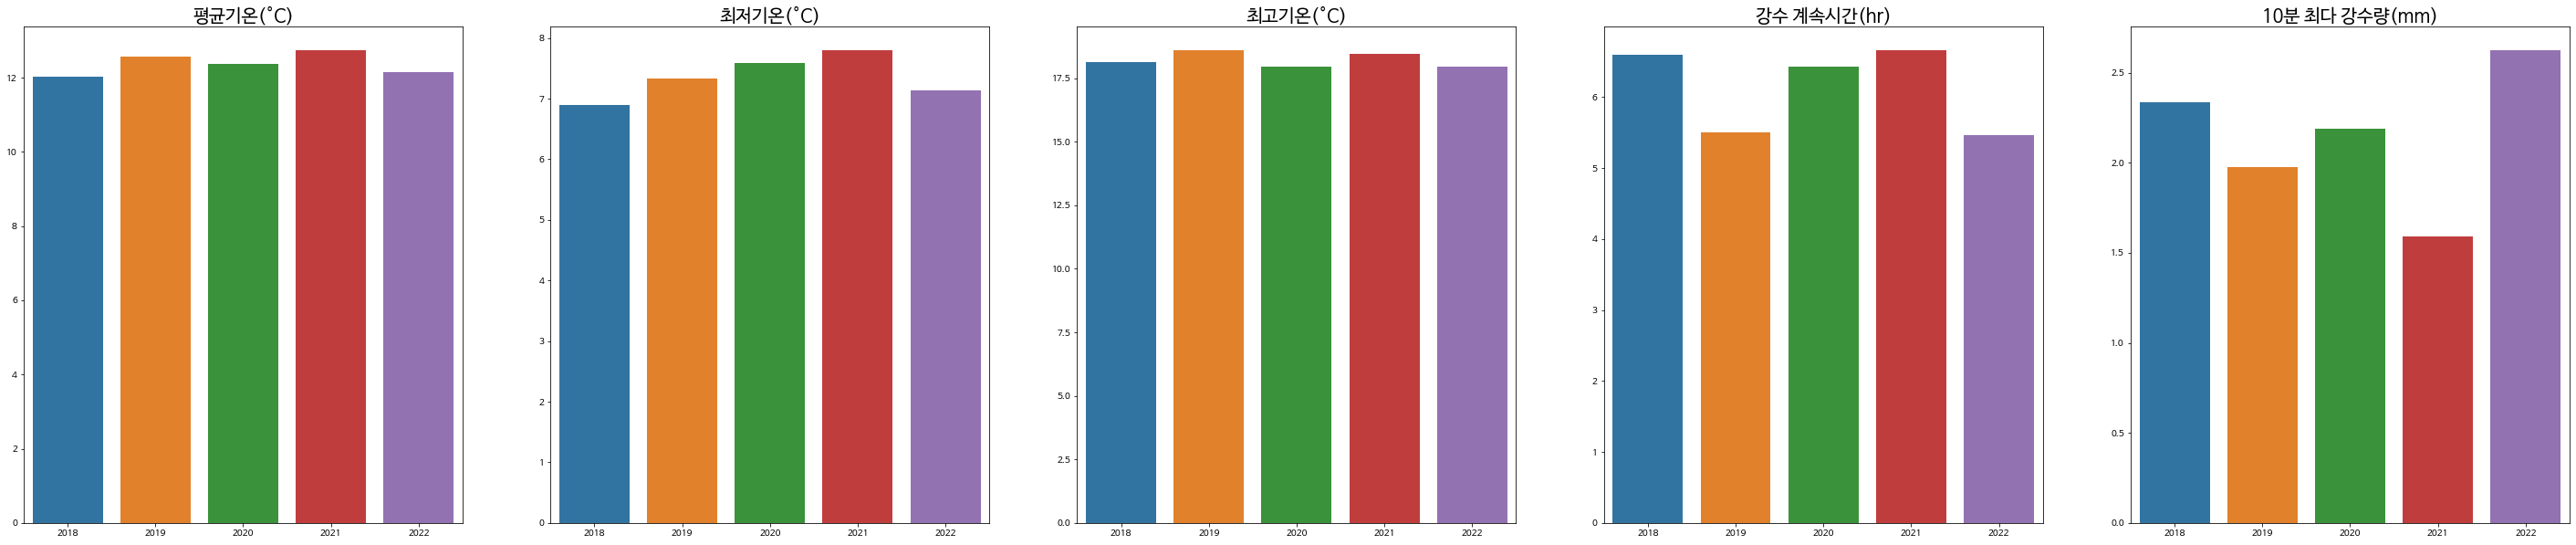

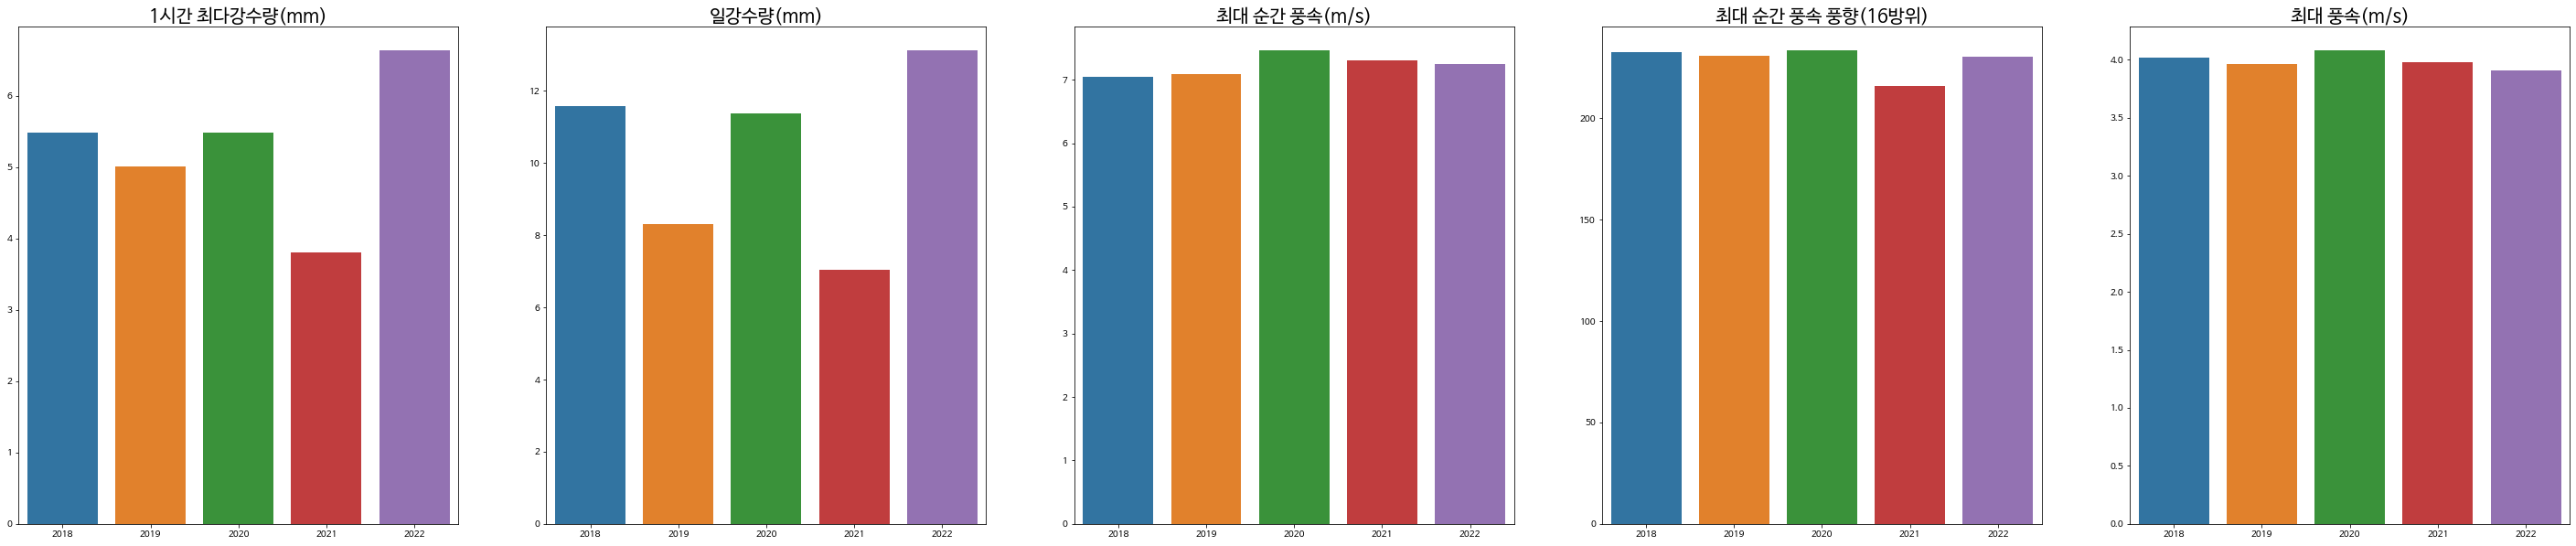

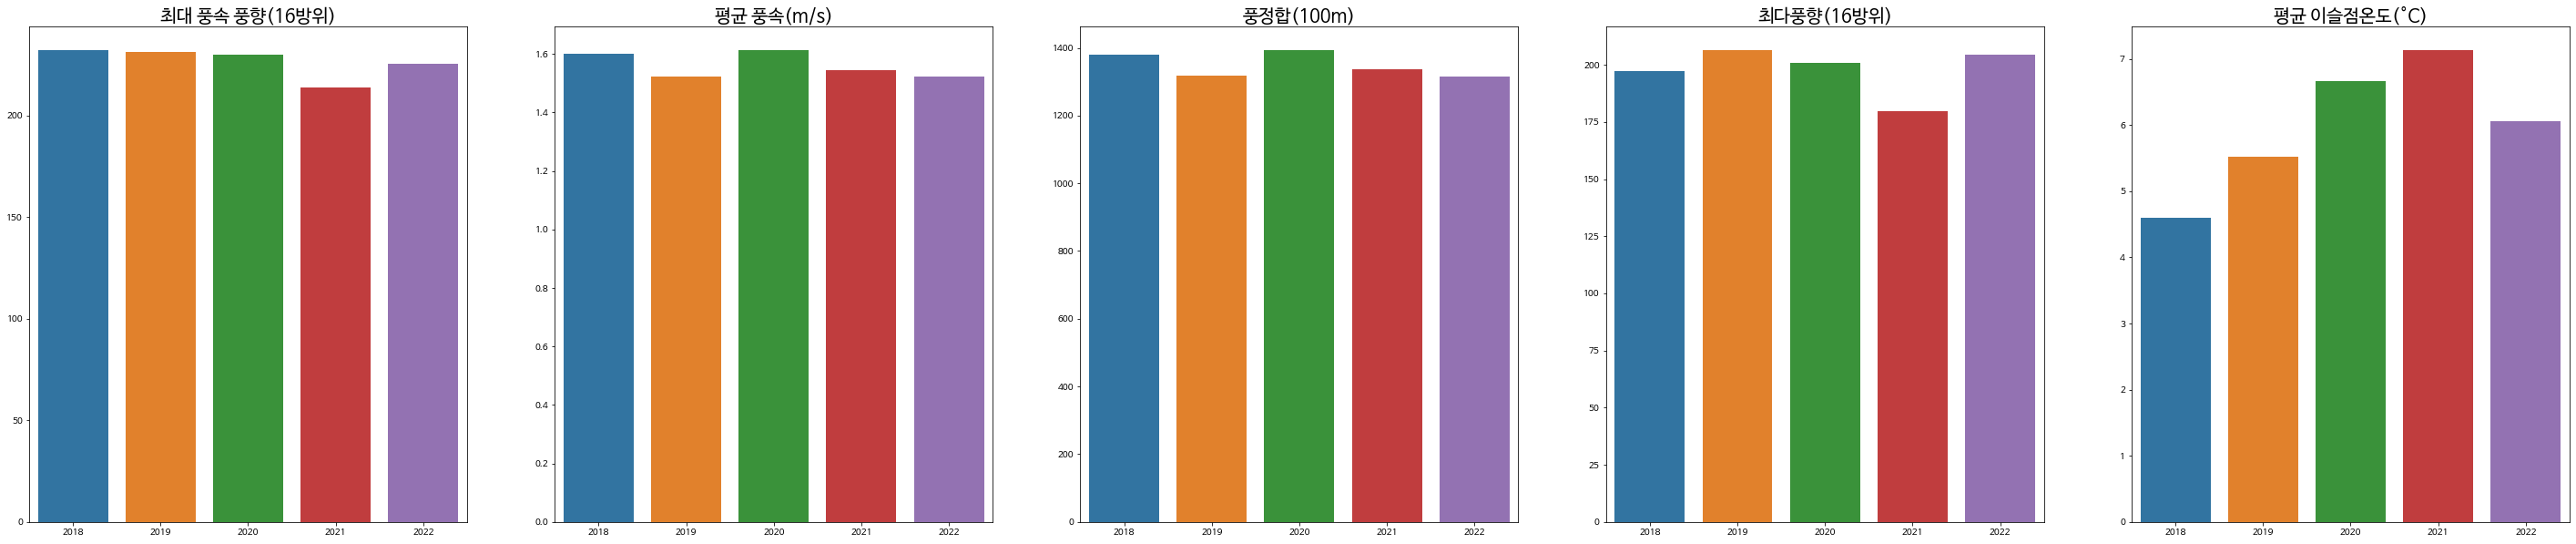

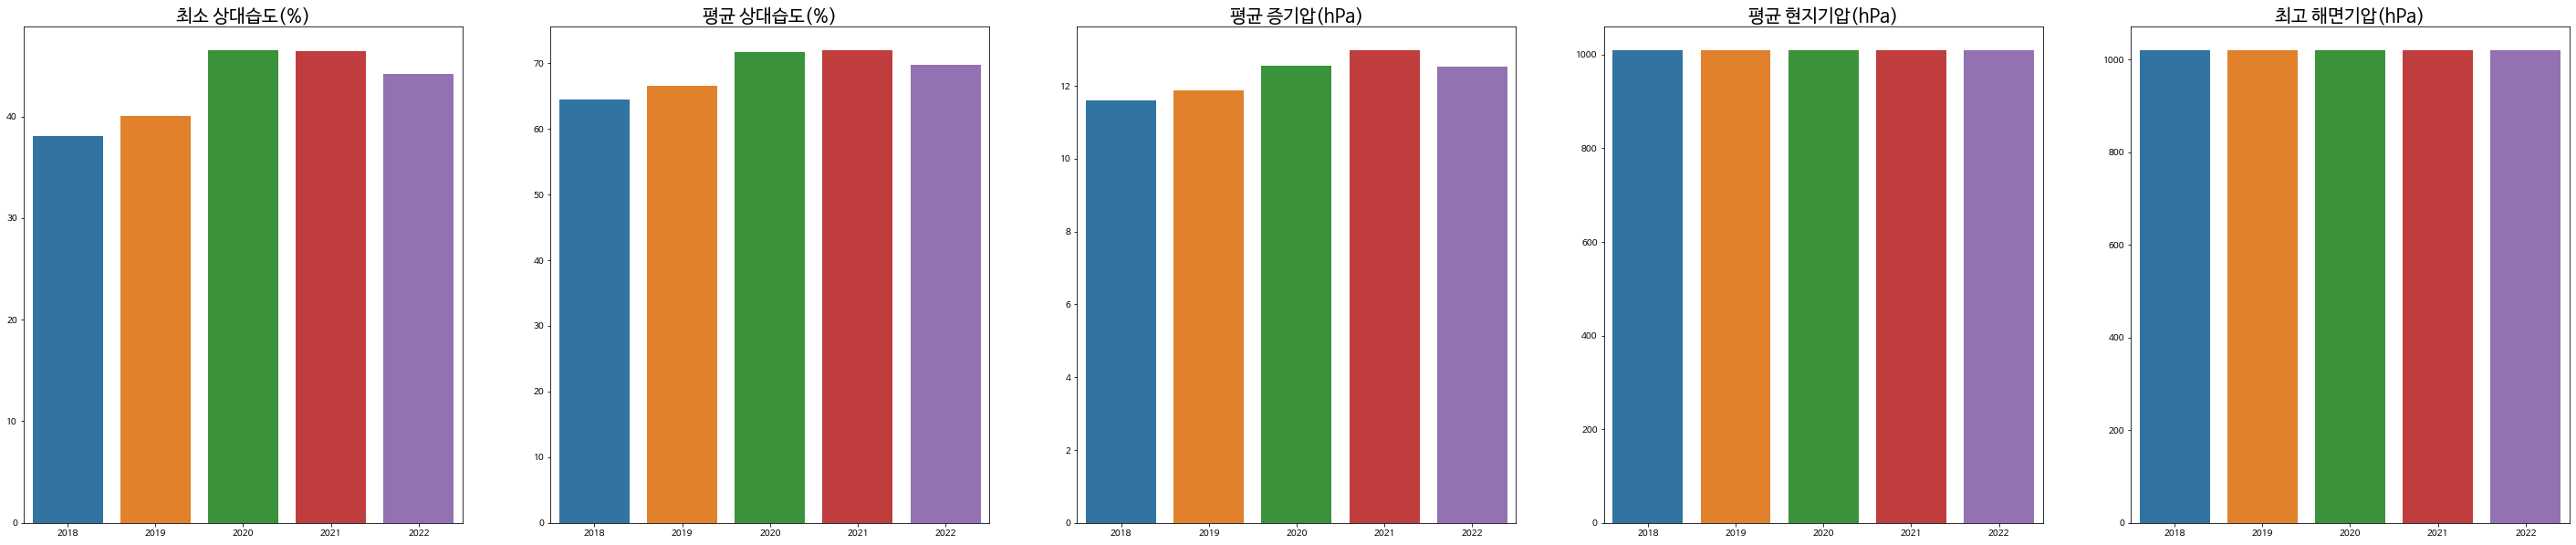

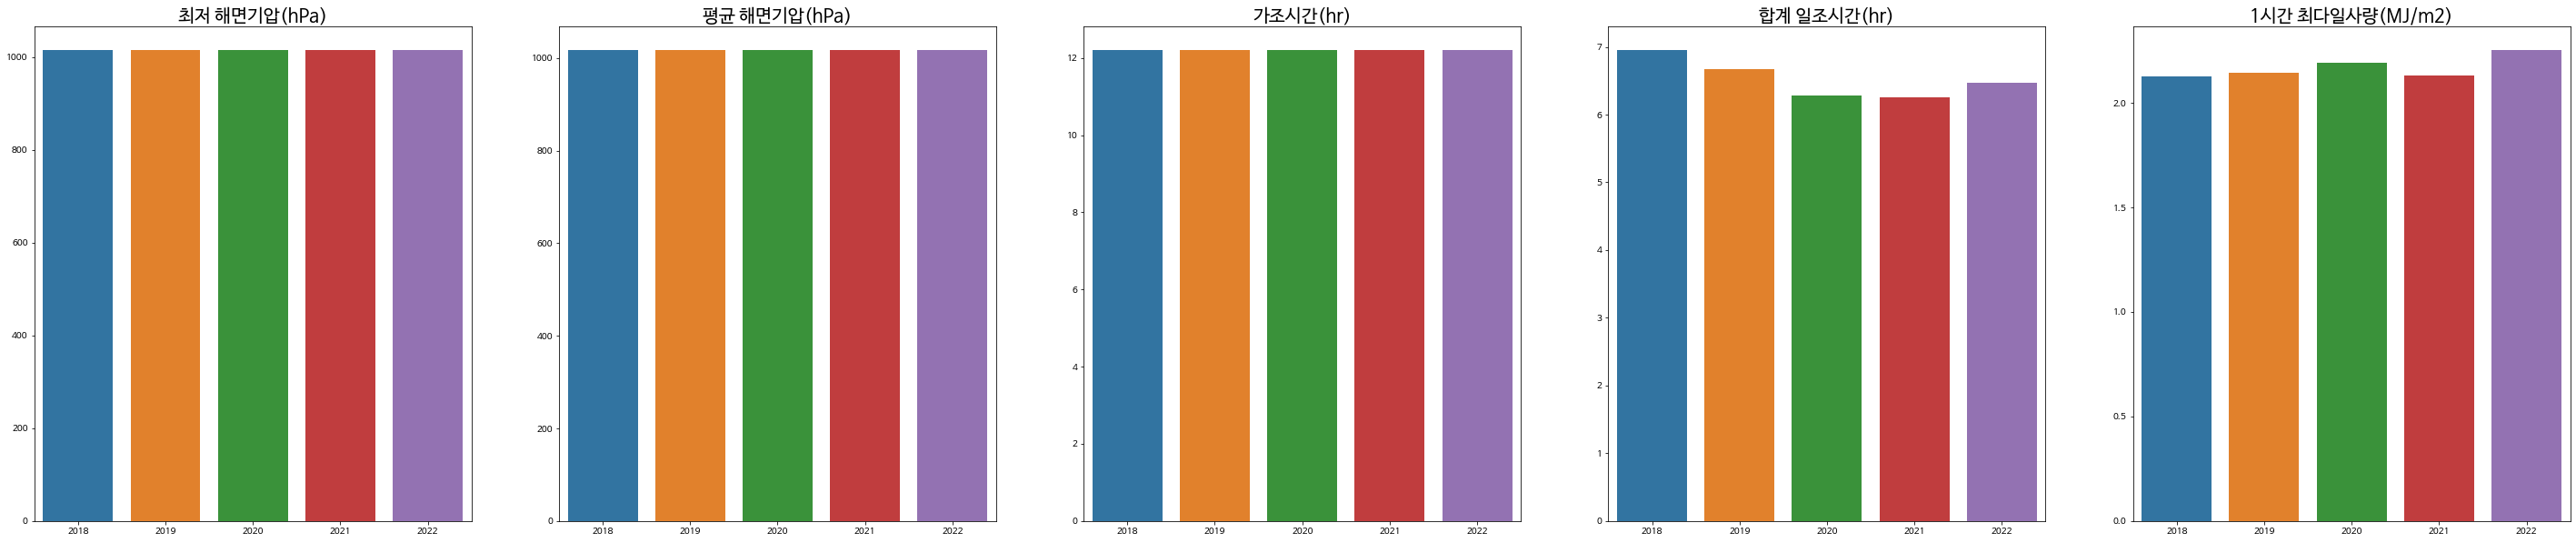

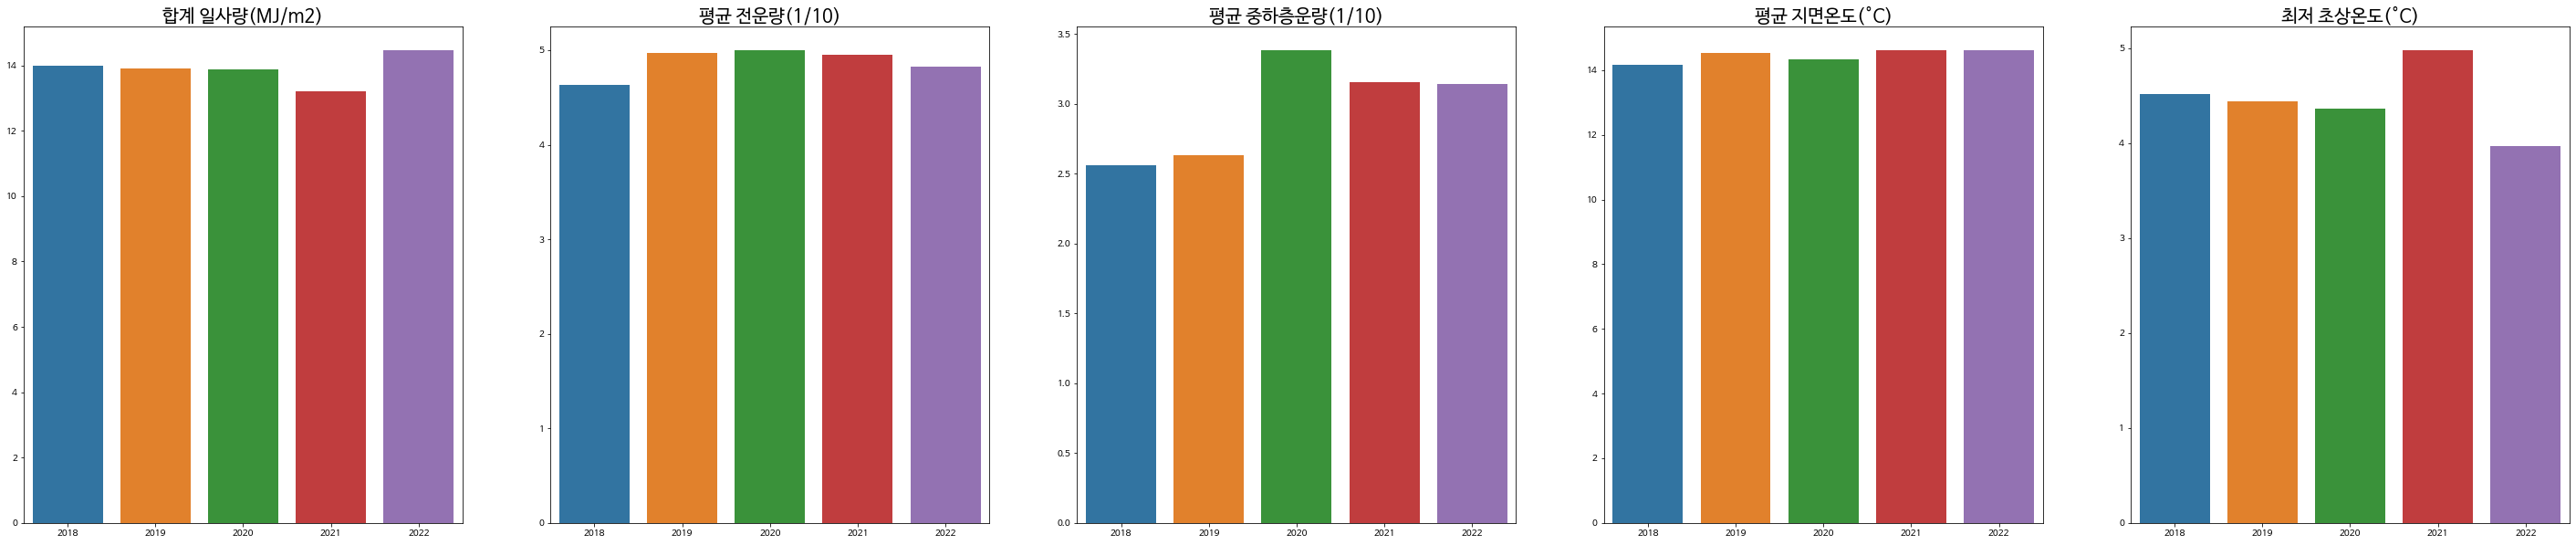

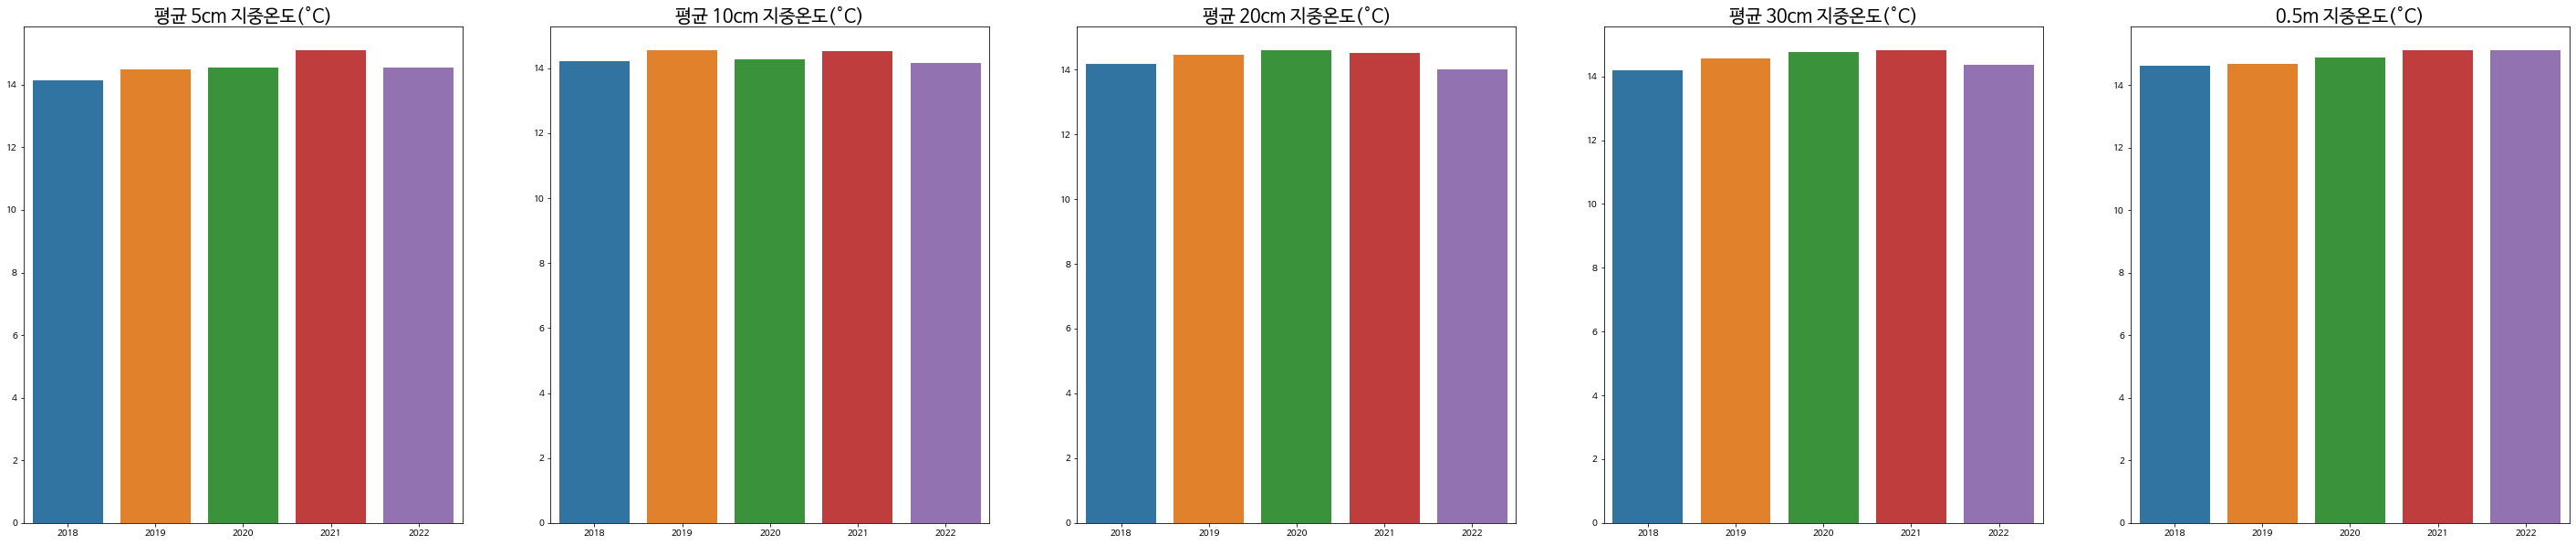

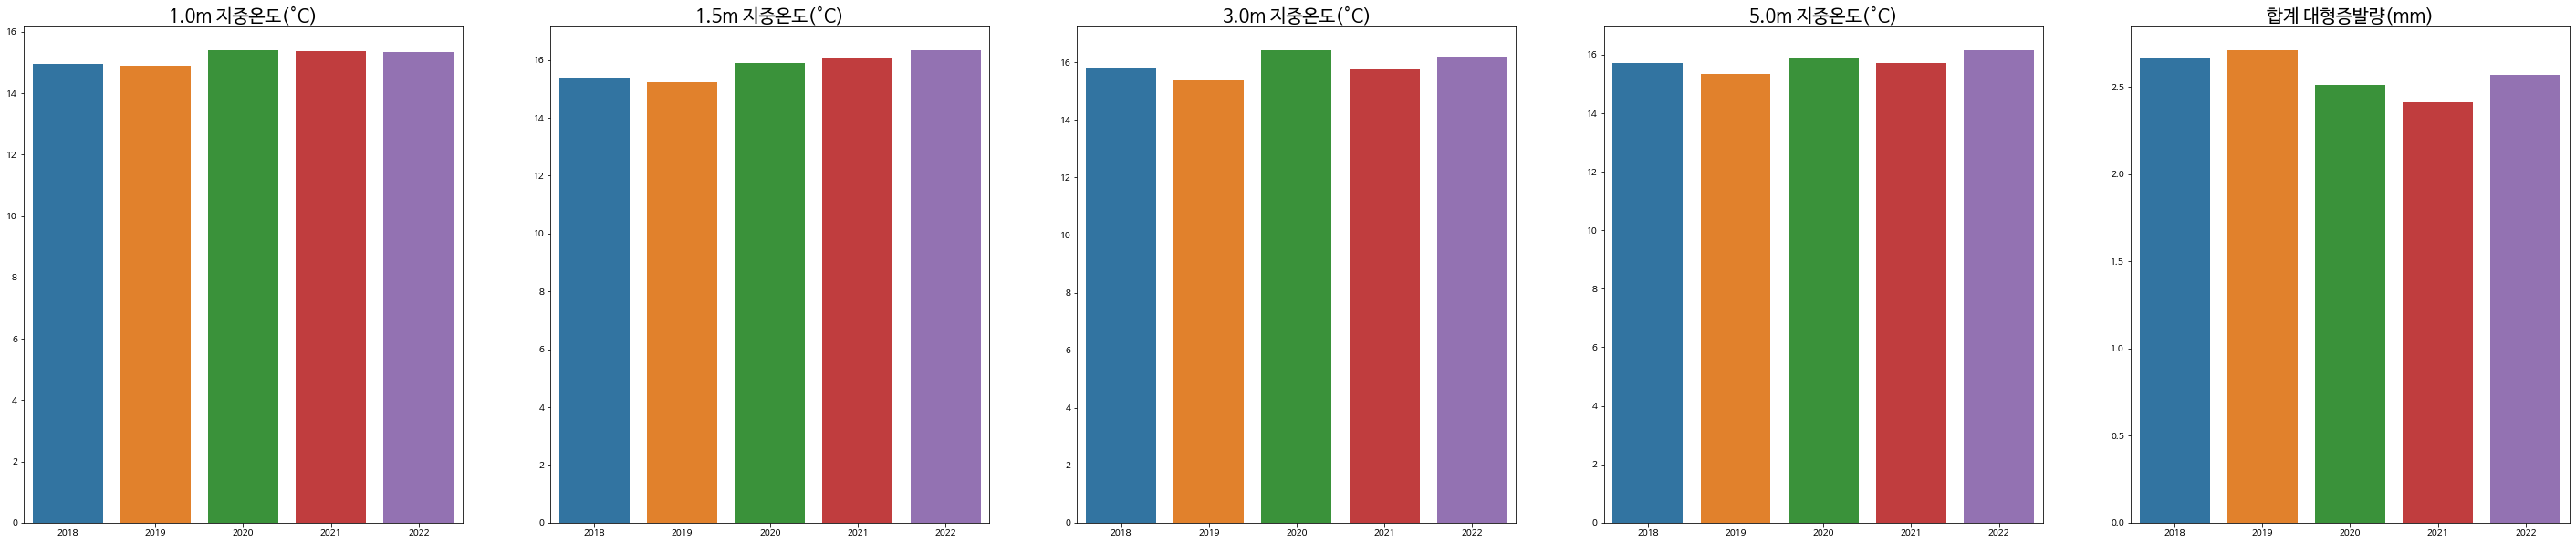

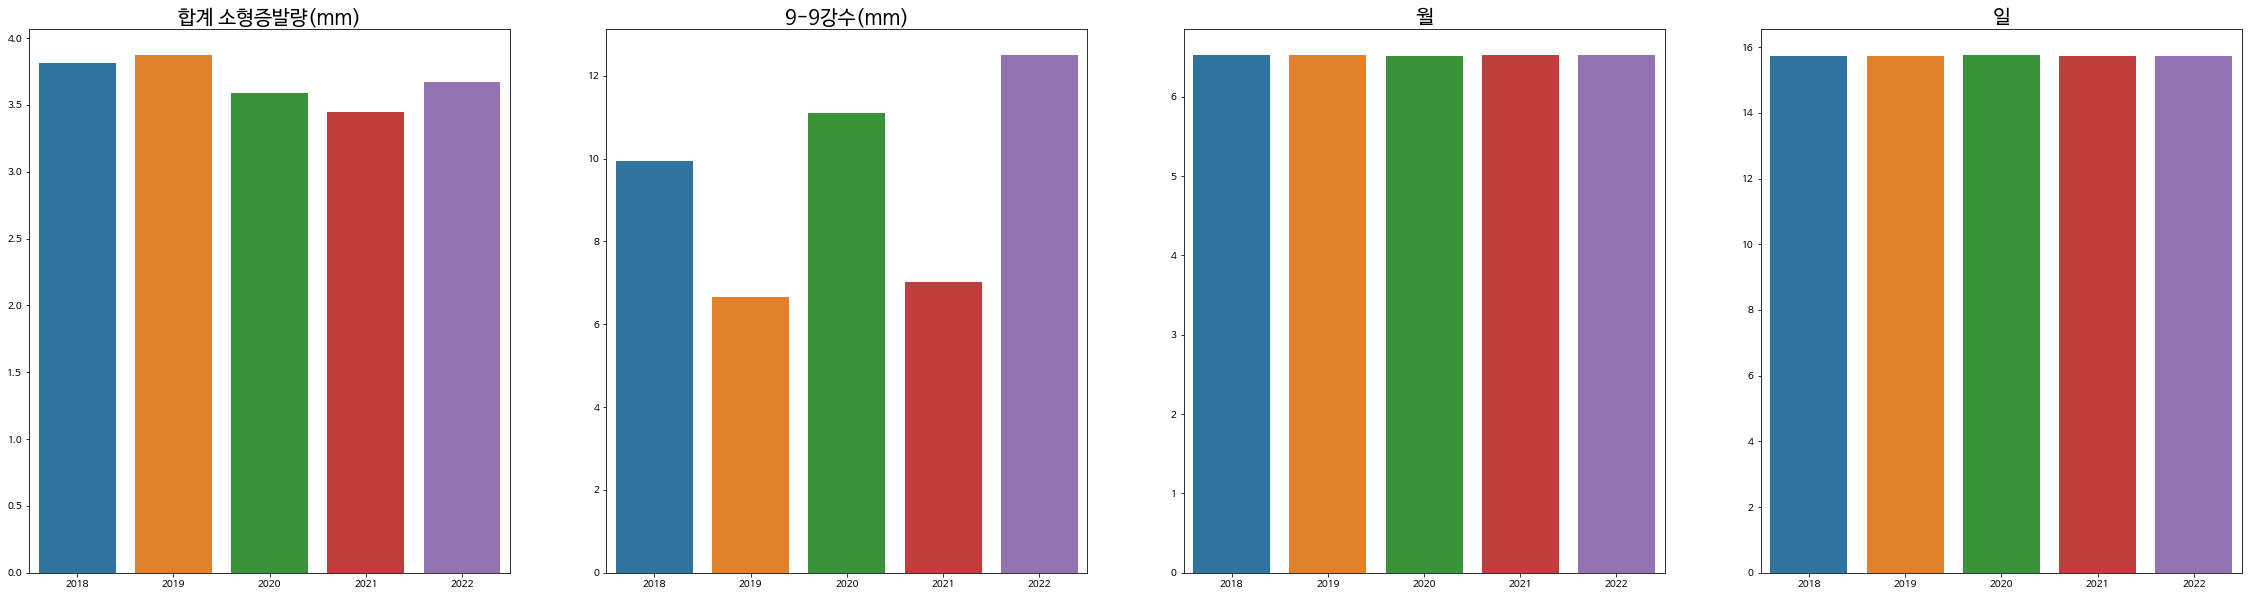

In [ ]:
year_plot(weather)

In [ ]:
# 월별 분포
def month_plot(df):
  plot_df = df.groupby('월').mean()

  for num in range(9):
    plt.figure(figsize=(50,10))
    plt.subplots_adjust(hspace=1)
    
    for idx in range(len(plot_df.columns[1+(5*num):6+(5*num)])):
      if num == 8:
        plt.subplot(1,4,idx+1)
      else:
        plt.subplot(1,5,idx+1)
      sns.barplot(x=plot_df.index , y=plot_df.iloc[:,1+(5*num)+idx])
      plt.xlabel('')
      plt.ylabel('')
      plt.title(plot_df.columns[1+(5*num)+idx],size=20)
    plt.show()


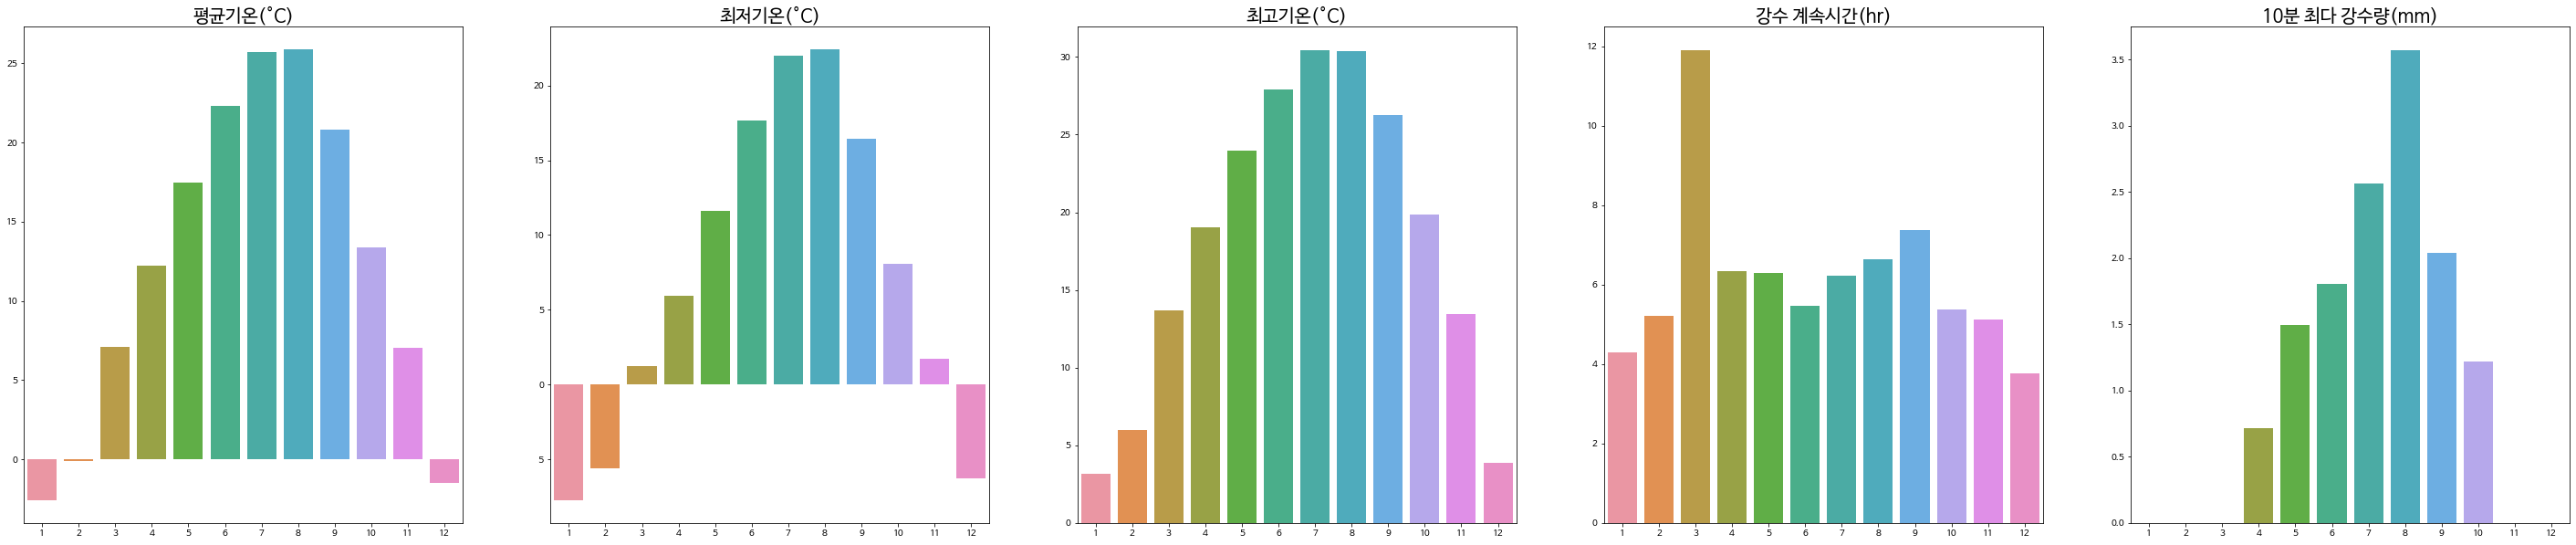

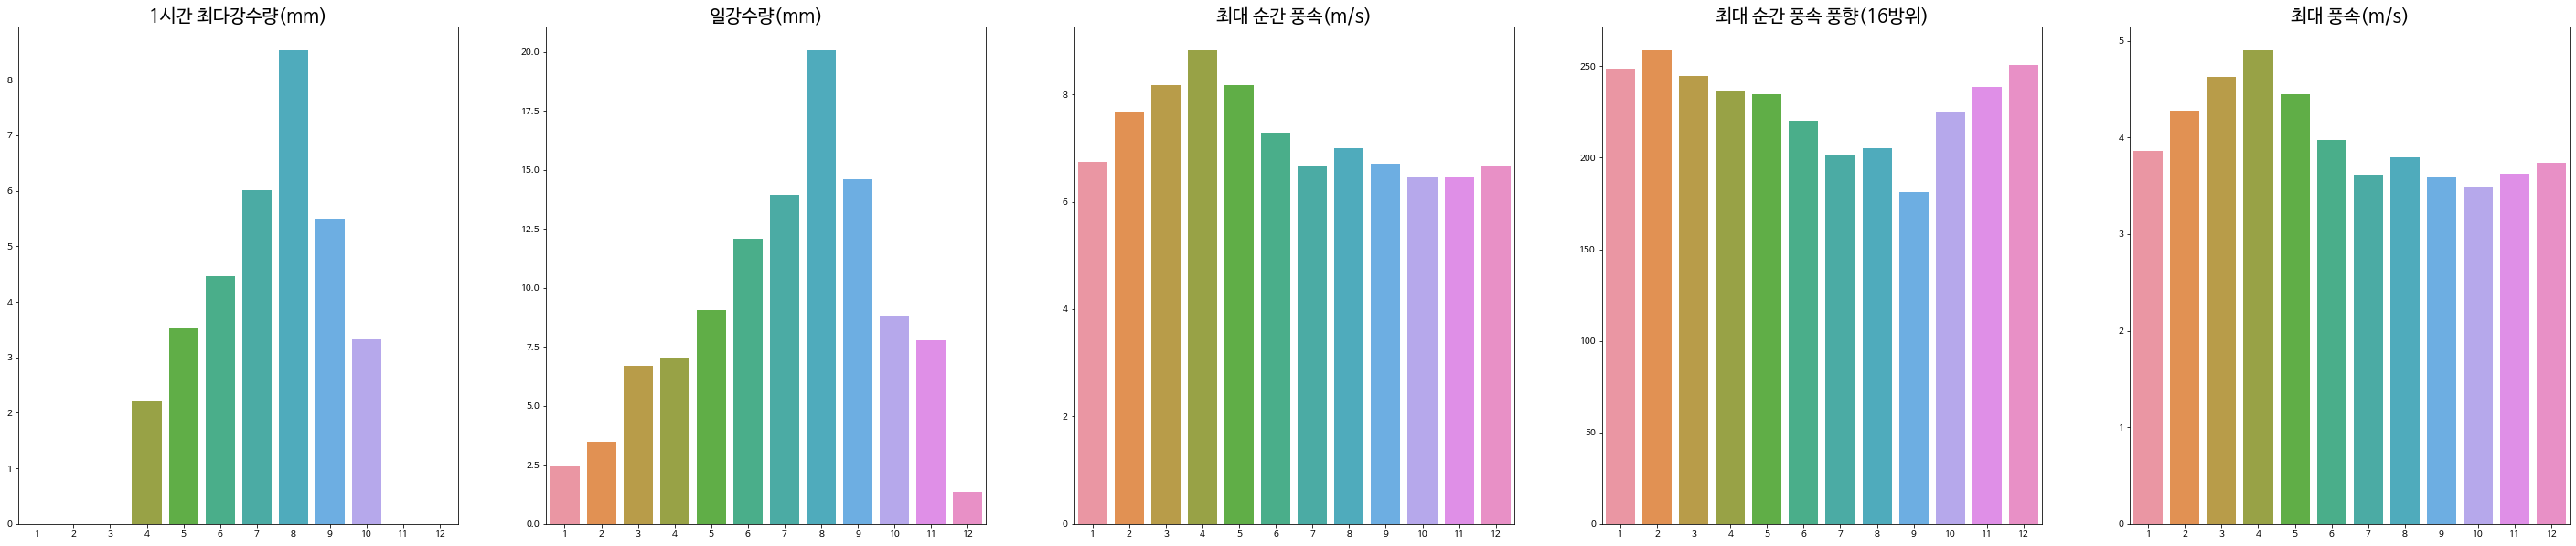

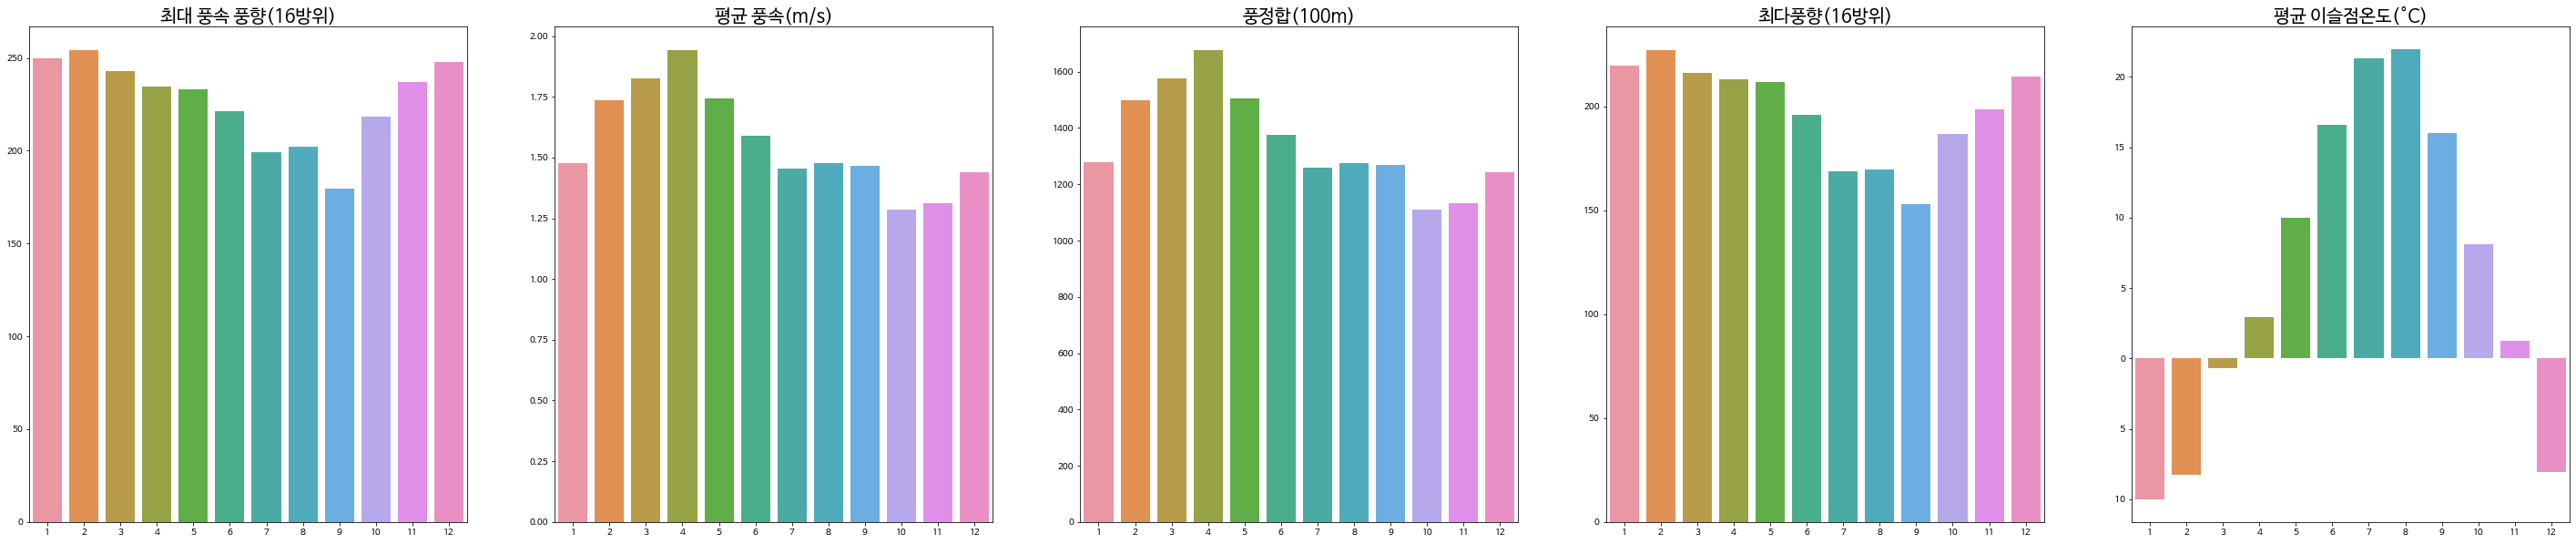

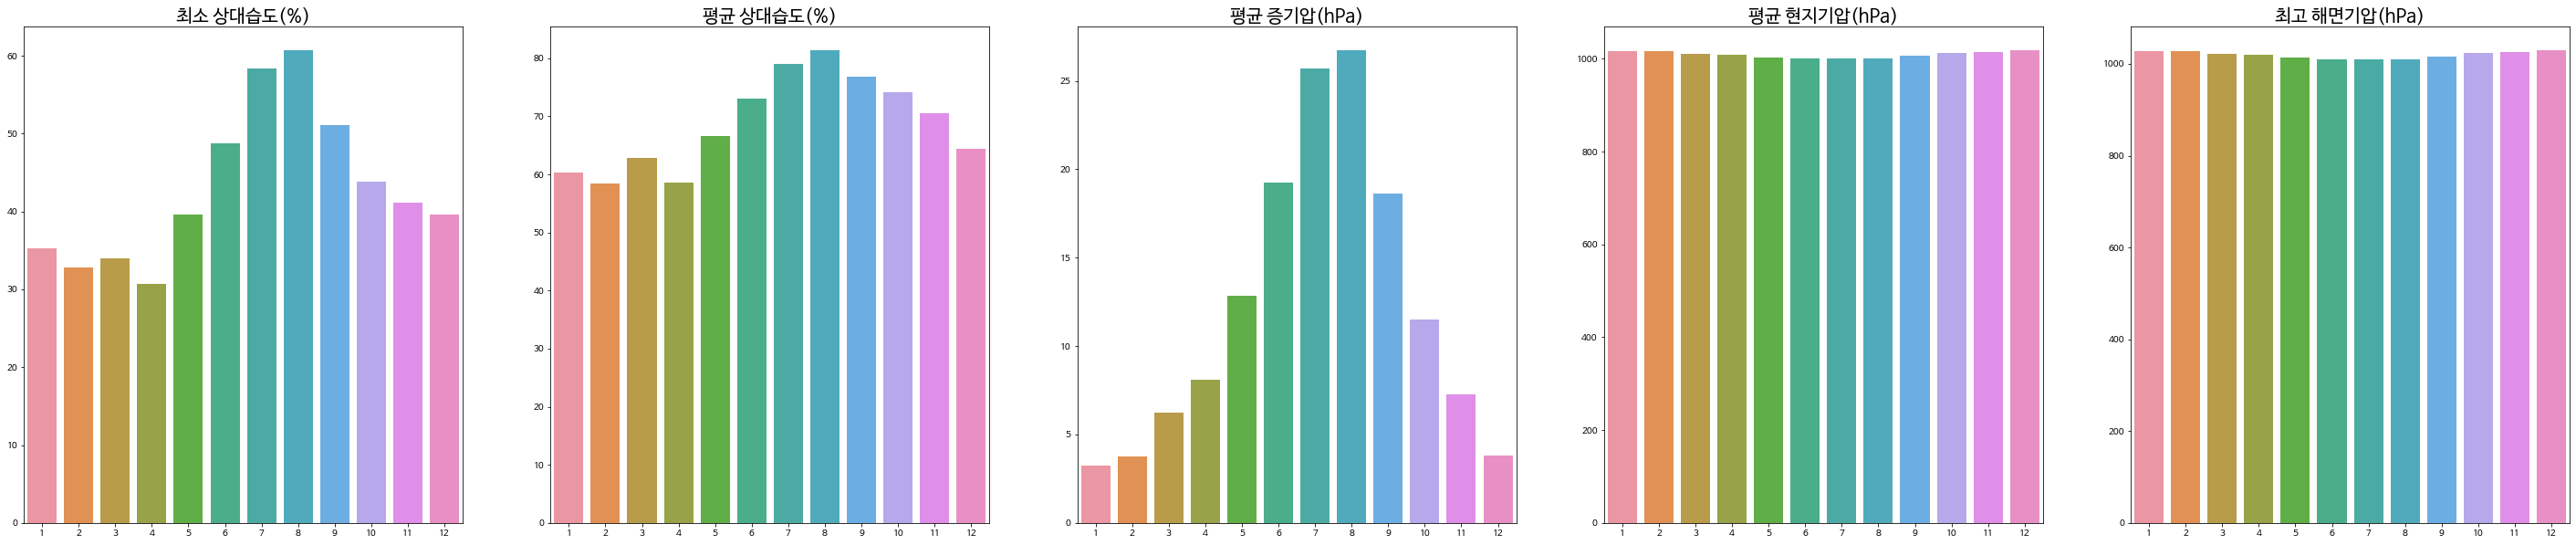

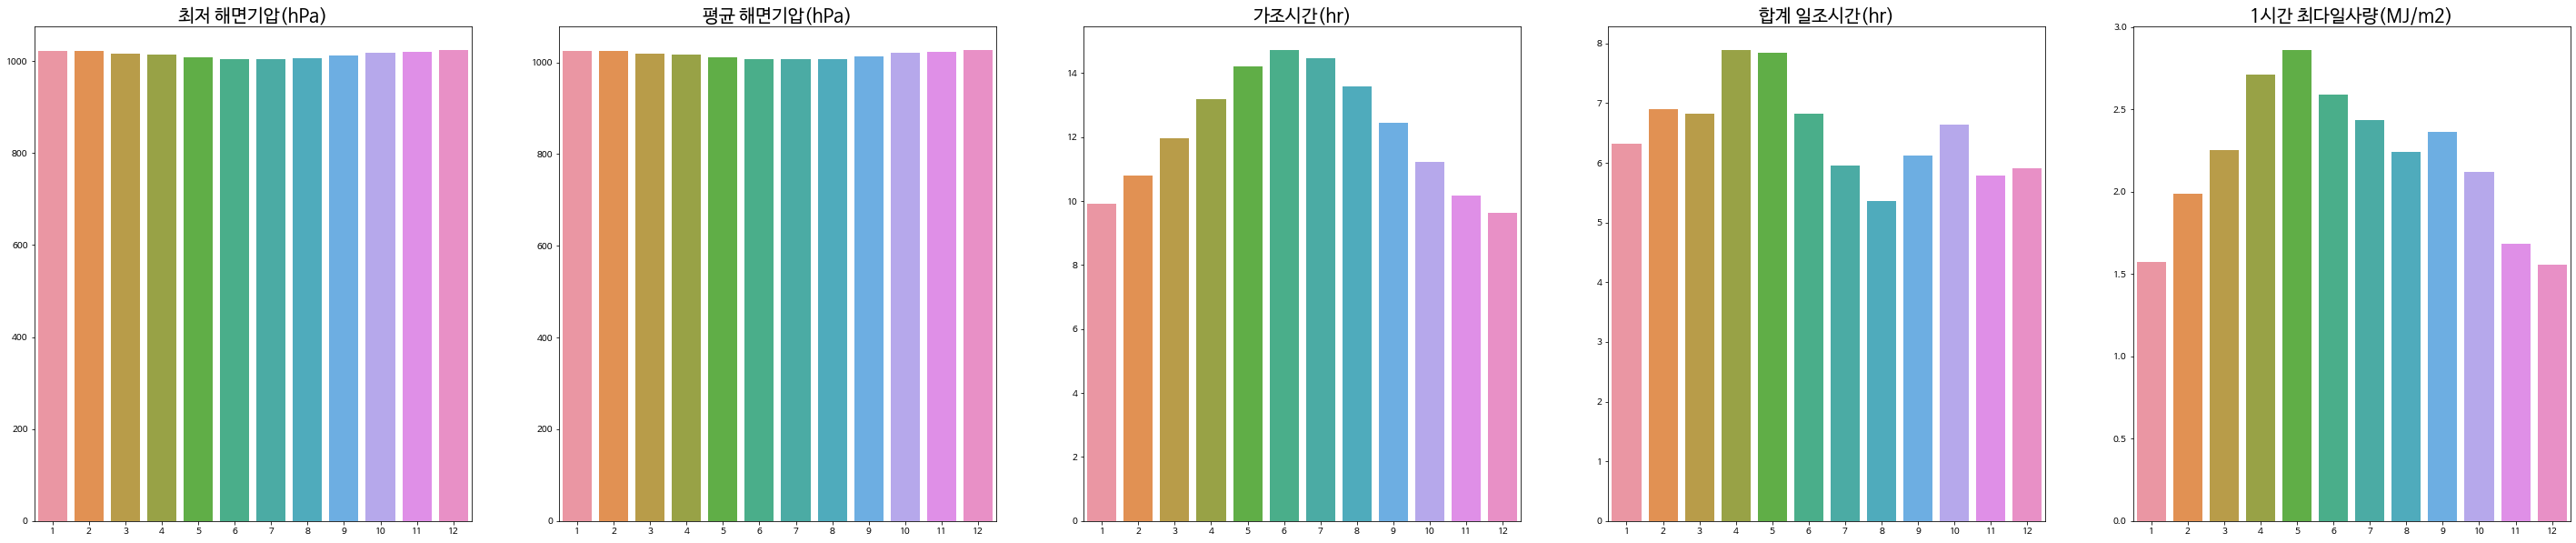

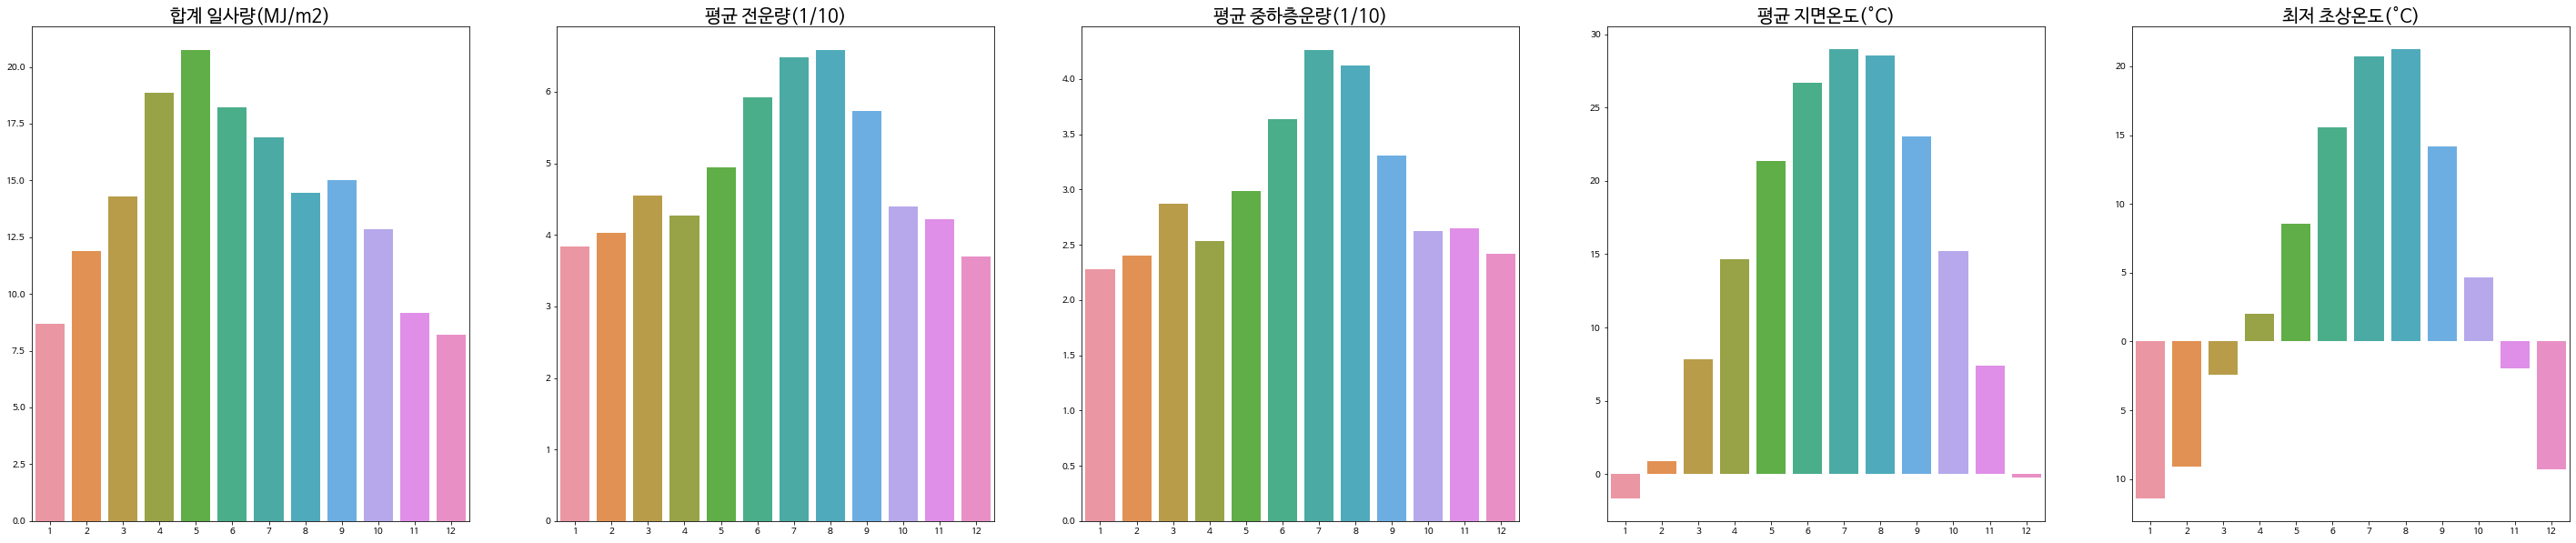

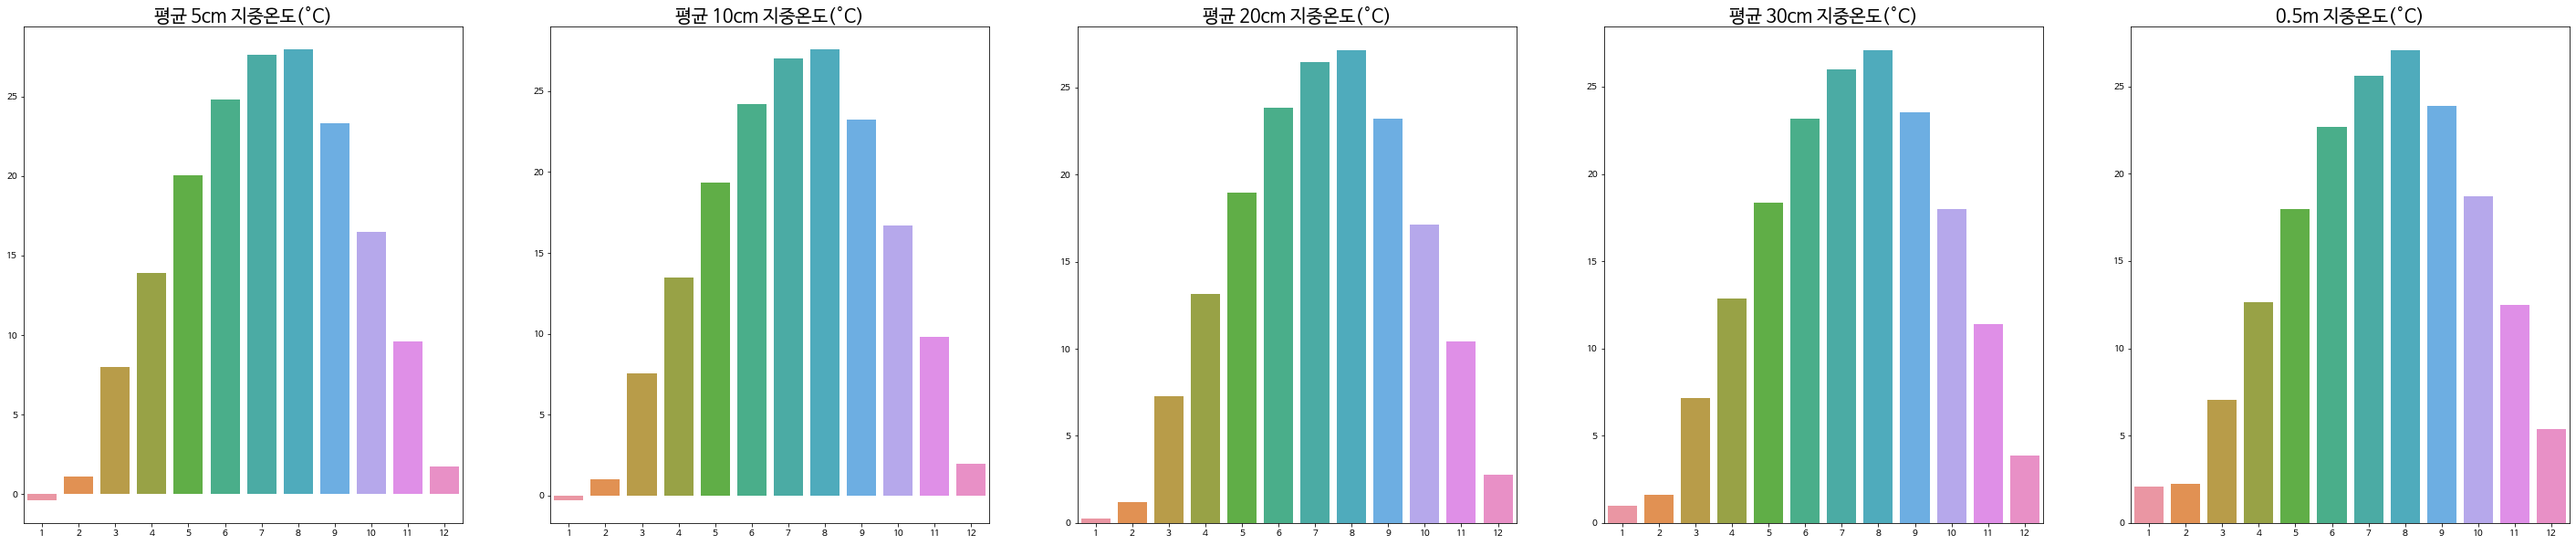

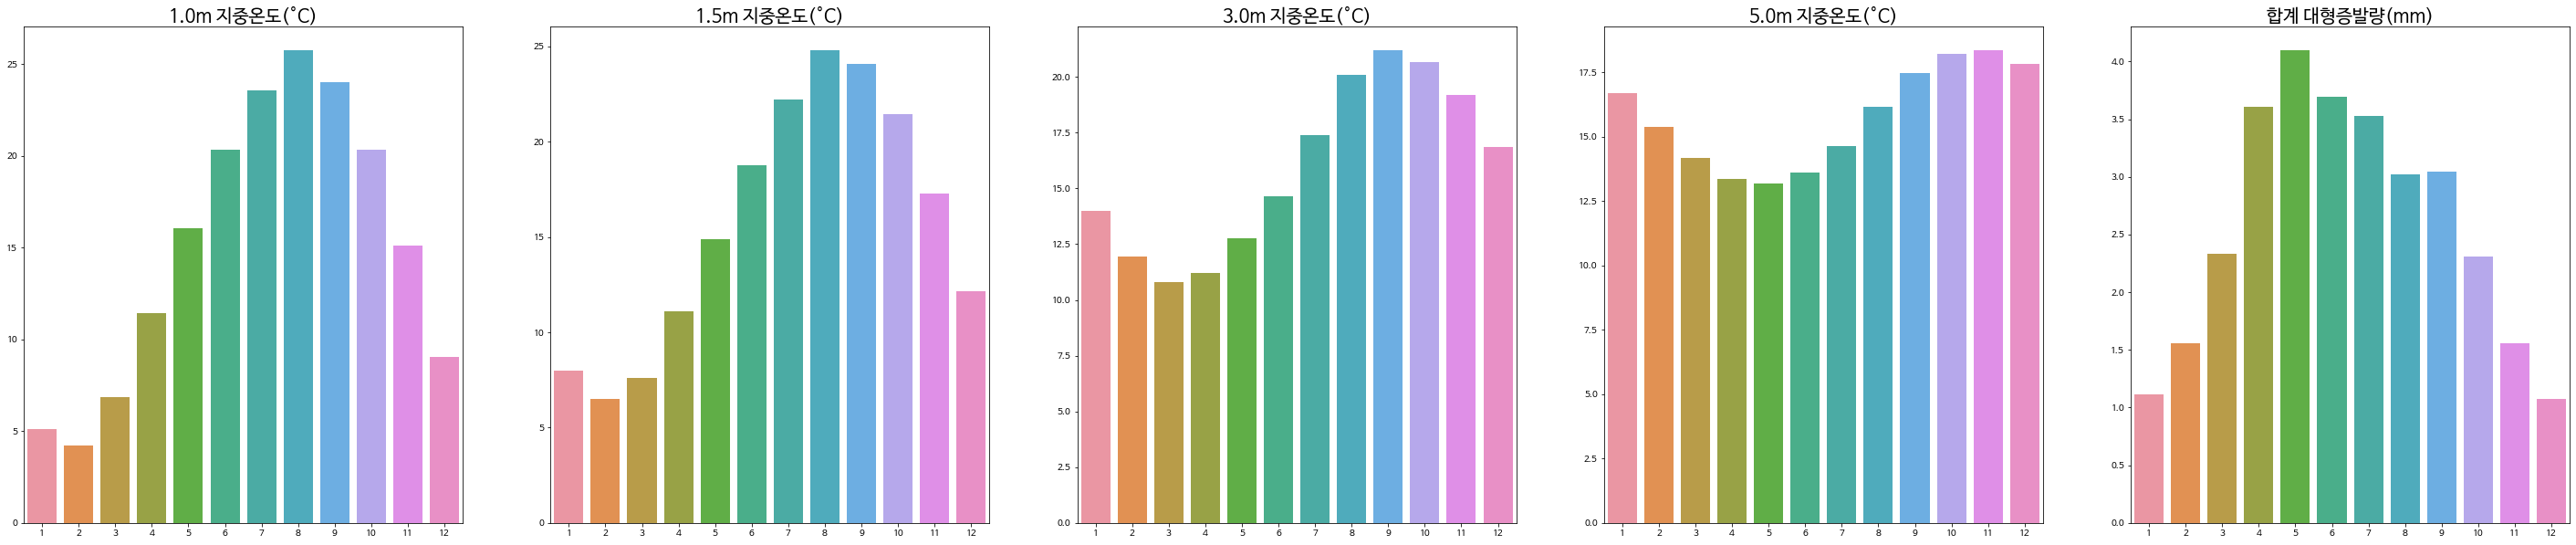

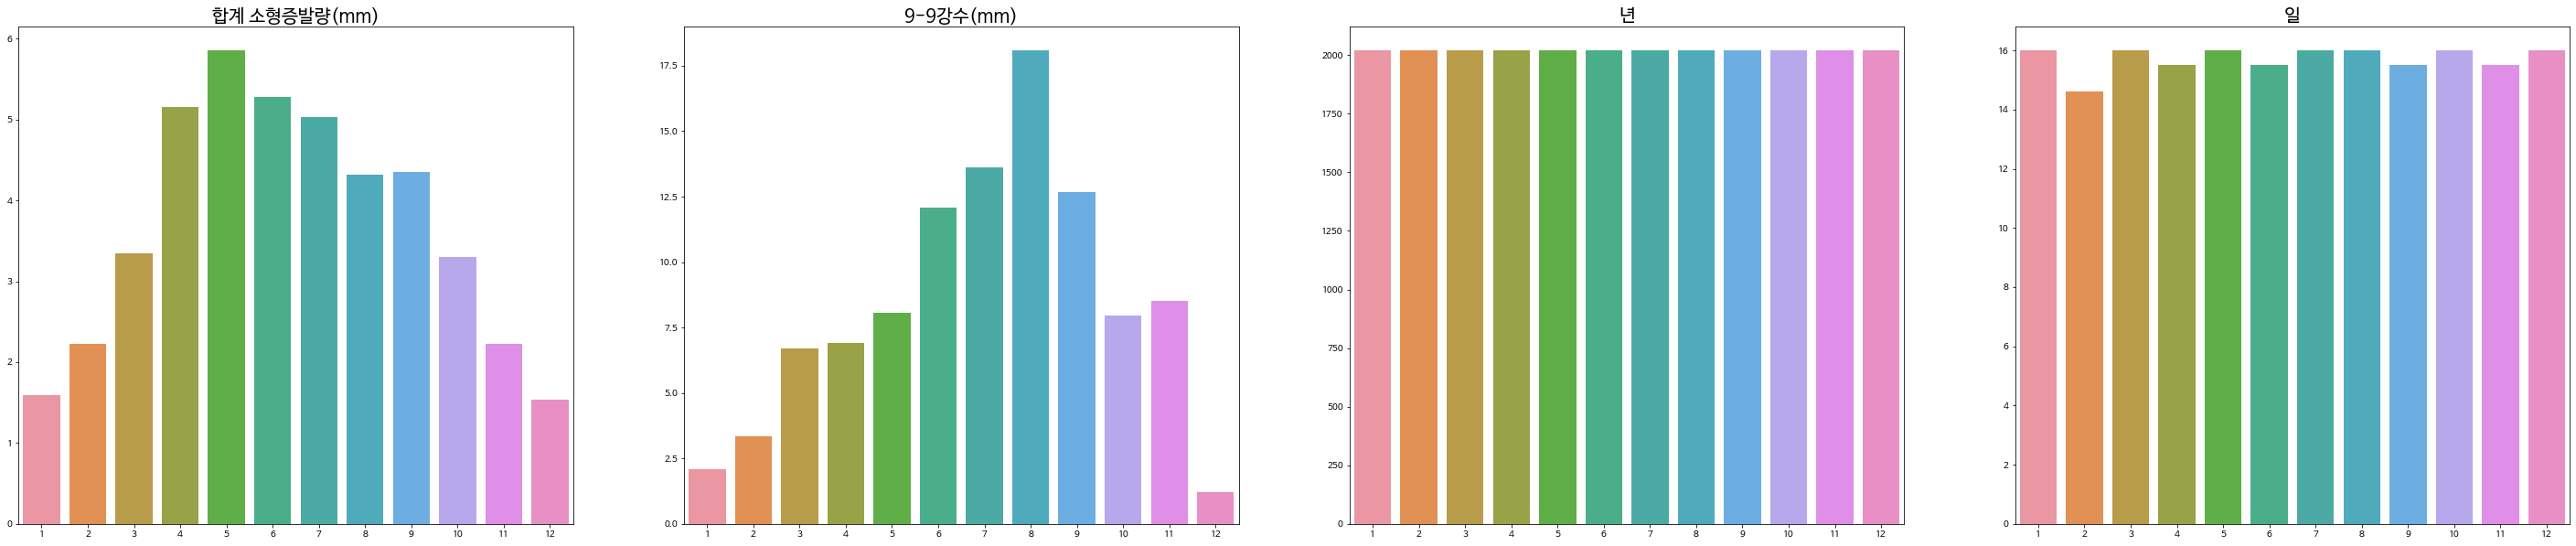

In [ ]:
month_plot(weather)

In [ ]:
# 지점별 분포
def point_plot(df):
  plot_df = df.groupby('지점명').mean()

  for num in range(9):
    plt.figure(figsize=(50,10))
    plt.subplots_adjust(hspace=1)
    
    for idx in range(len(plot_df.columns[1+(5*num):6+(5*num)])):
      plt.subplot(1,5,idx+1)
      
      # if ('일사량' in plot_df.columns[1+(5*num):6+(5*num)][idx]) | ('전운량' in plot_df.columns[1+(5*num):6+(5*num)][idx]) | ('중하층운량' in plot_df.columns[1+(5*num):6+(5*num)][idx]) | ('증발량' in plot_df.columns[1+(5*num):6+(5*num)][idx]) | ('9-9' in plot_df.columns[1+(5*num):6+(5*num)][idx]):
      #   sns.barplot(x = ['서울','수원'], y = [plot_df.loc['서울'][plot_df.columns[1+(5*num):6+(5*num)][idx]] , plot_df.loc['서울'][plot_df.columns[1+(5*num):6+(5*num)][idx]]])
      # elif  ('지중온도' in plot_df.columns[1+(5*num):6+(5*num)][idx]):
      #   sns.barplot(x= ['서울'] , y= plot_df.loc['서울'][plot_df.columns[1+(5*num):6+(5*num)][idx]])
      # else:
      
      sns.barplot(x=plot_df.index , y=plot_df.iloc[:,1+(5*num)+idx])

      plt.xlabel('')
      plt.ylabel('')
      plt.title(plot_df.columns[1+(5*num)+idx],size=20)
    plt.show()


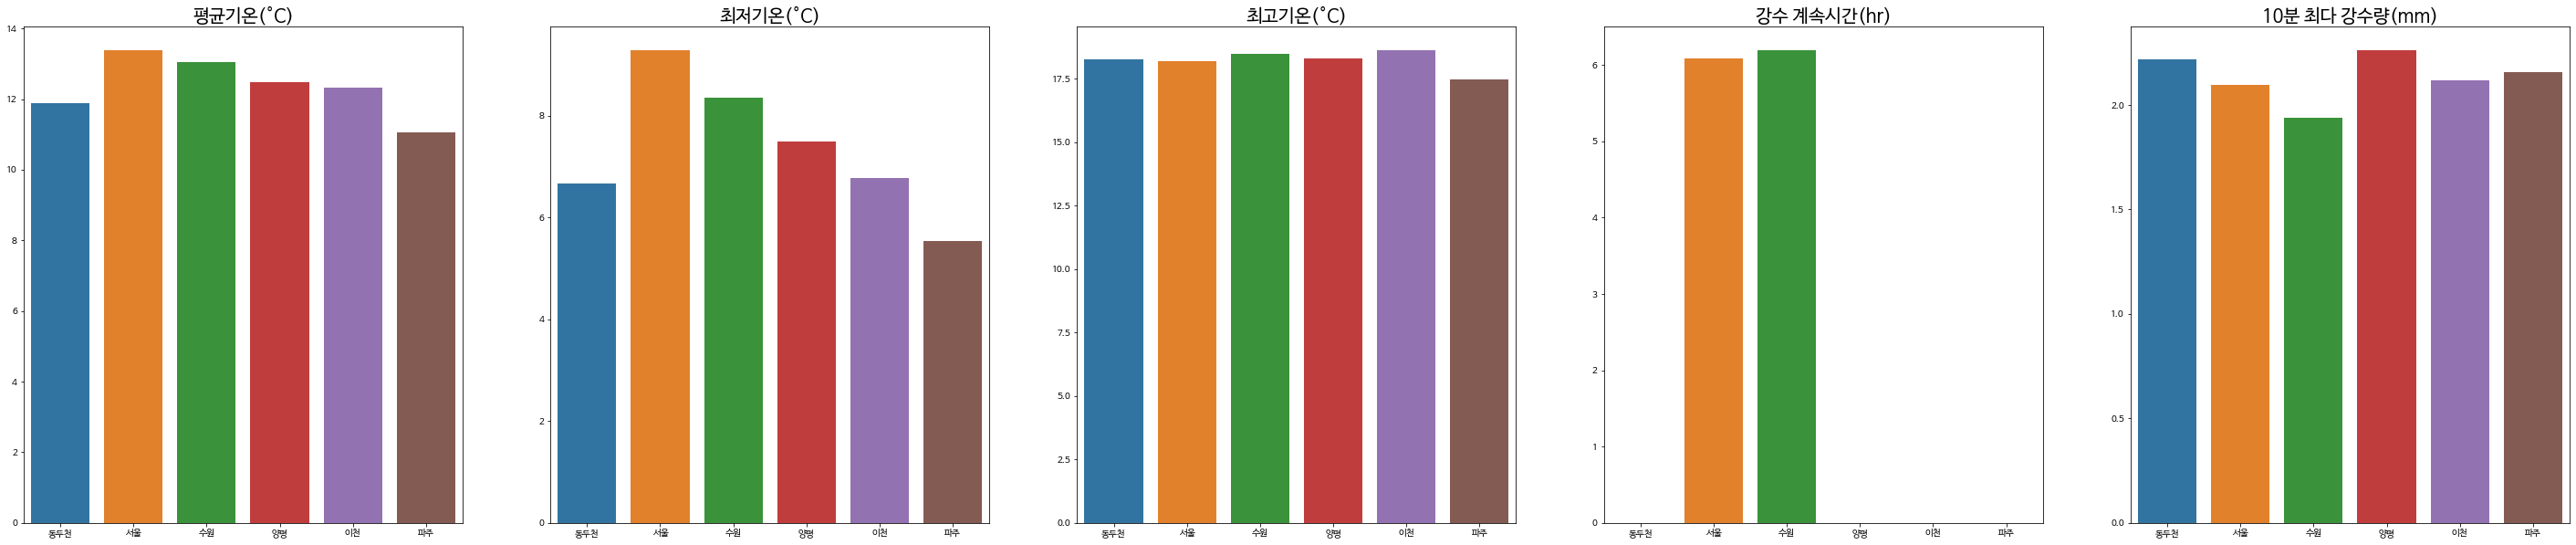

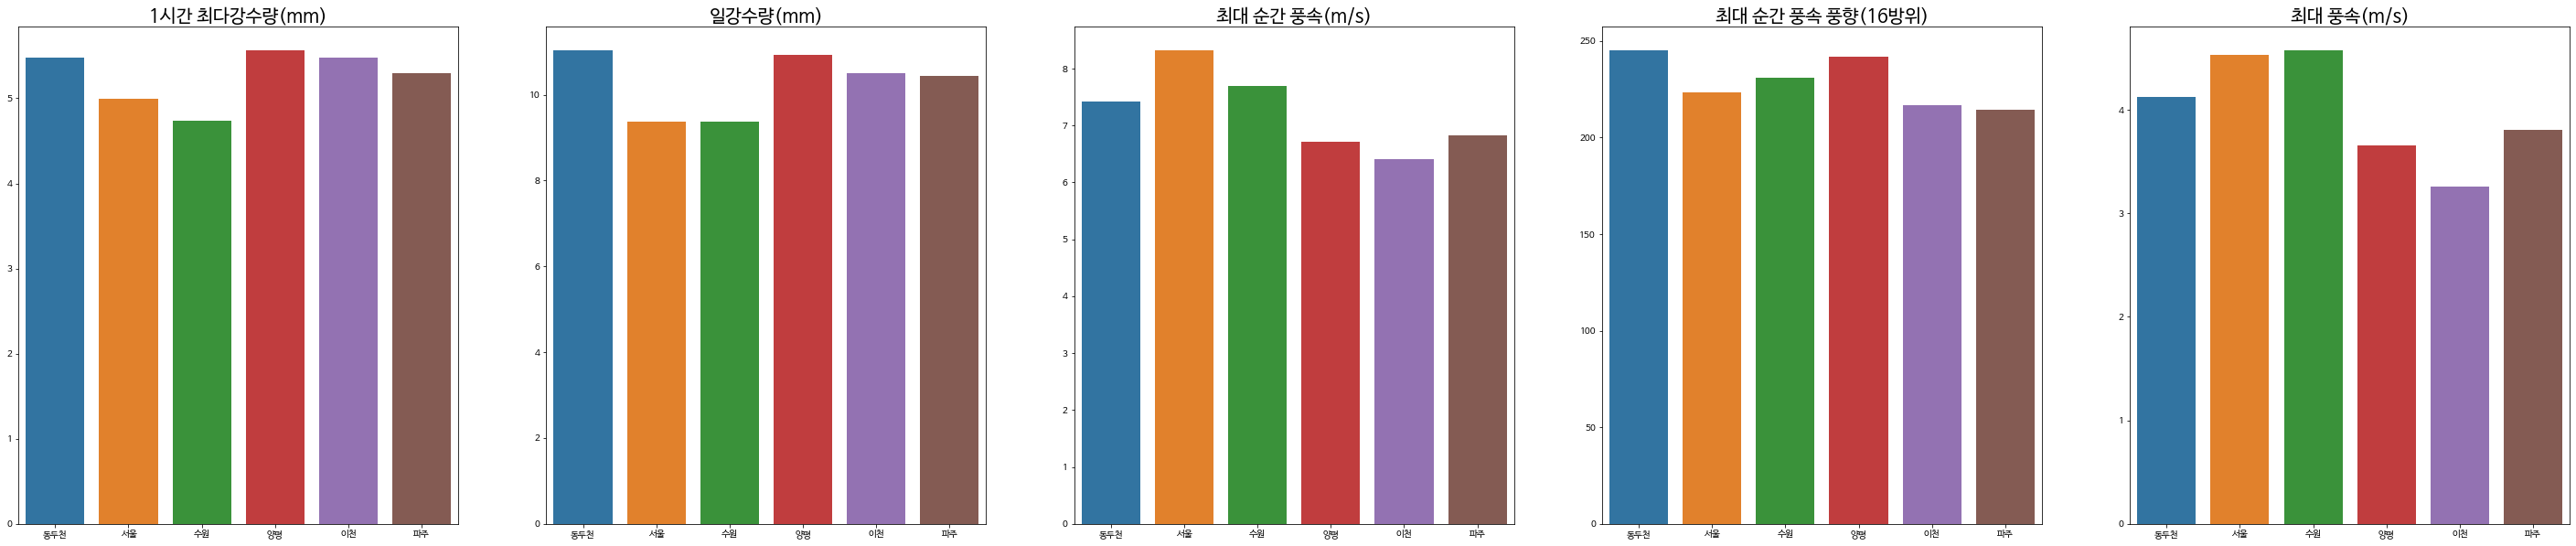

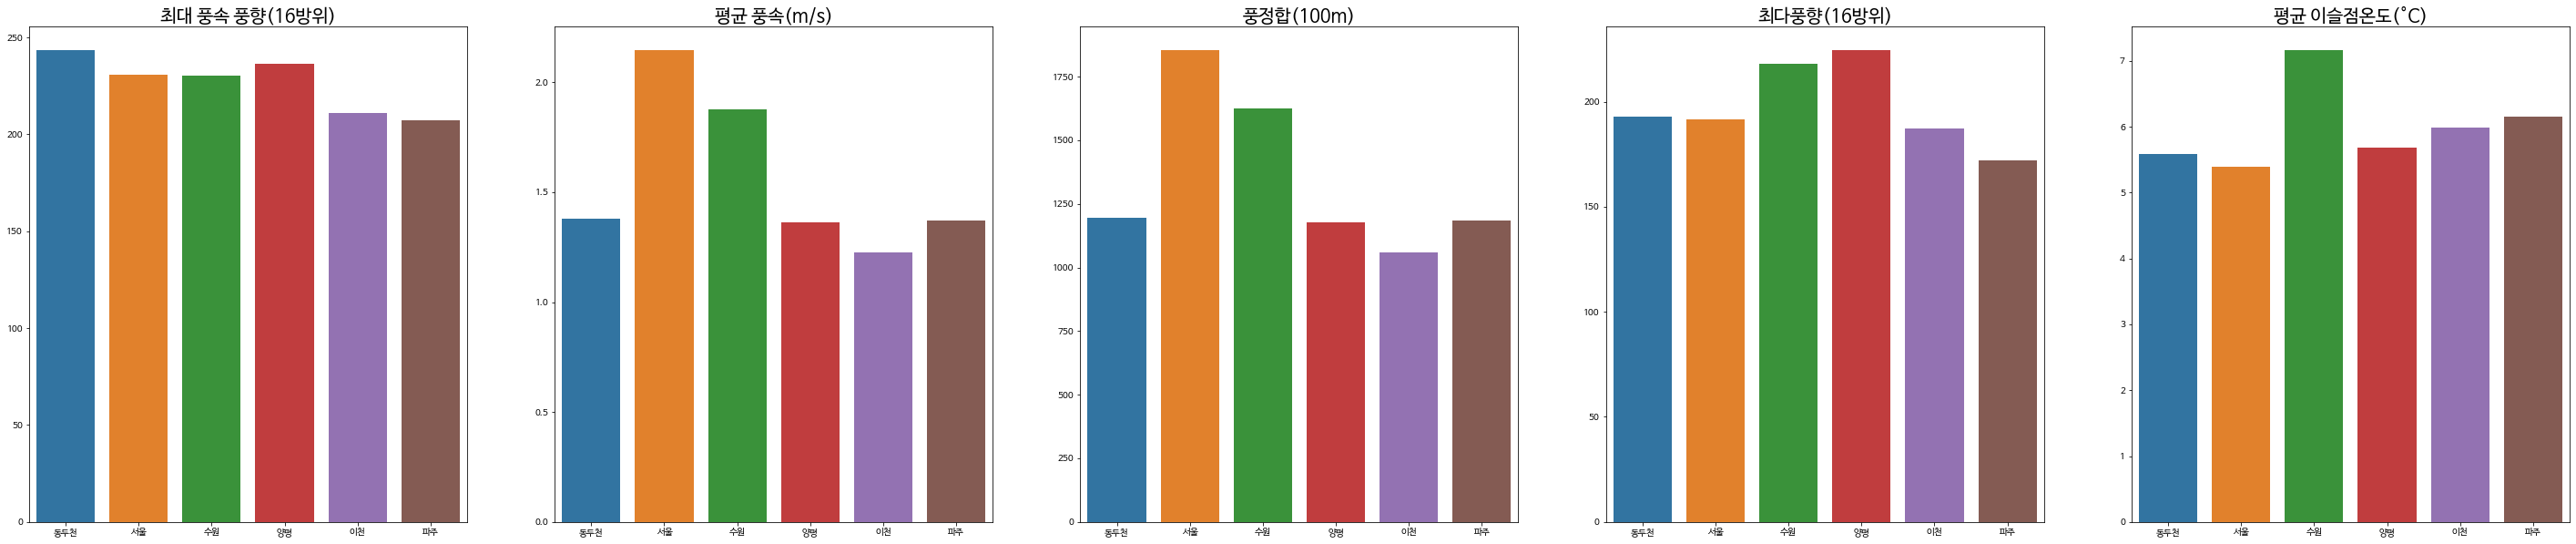

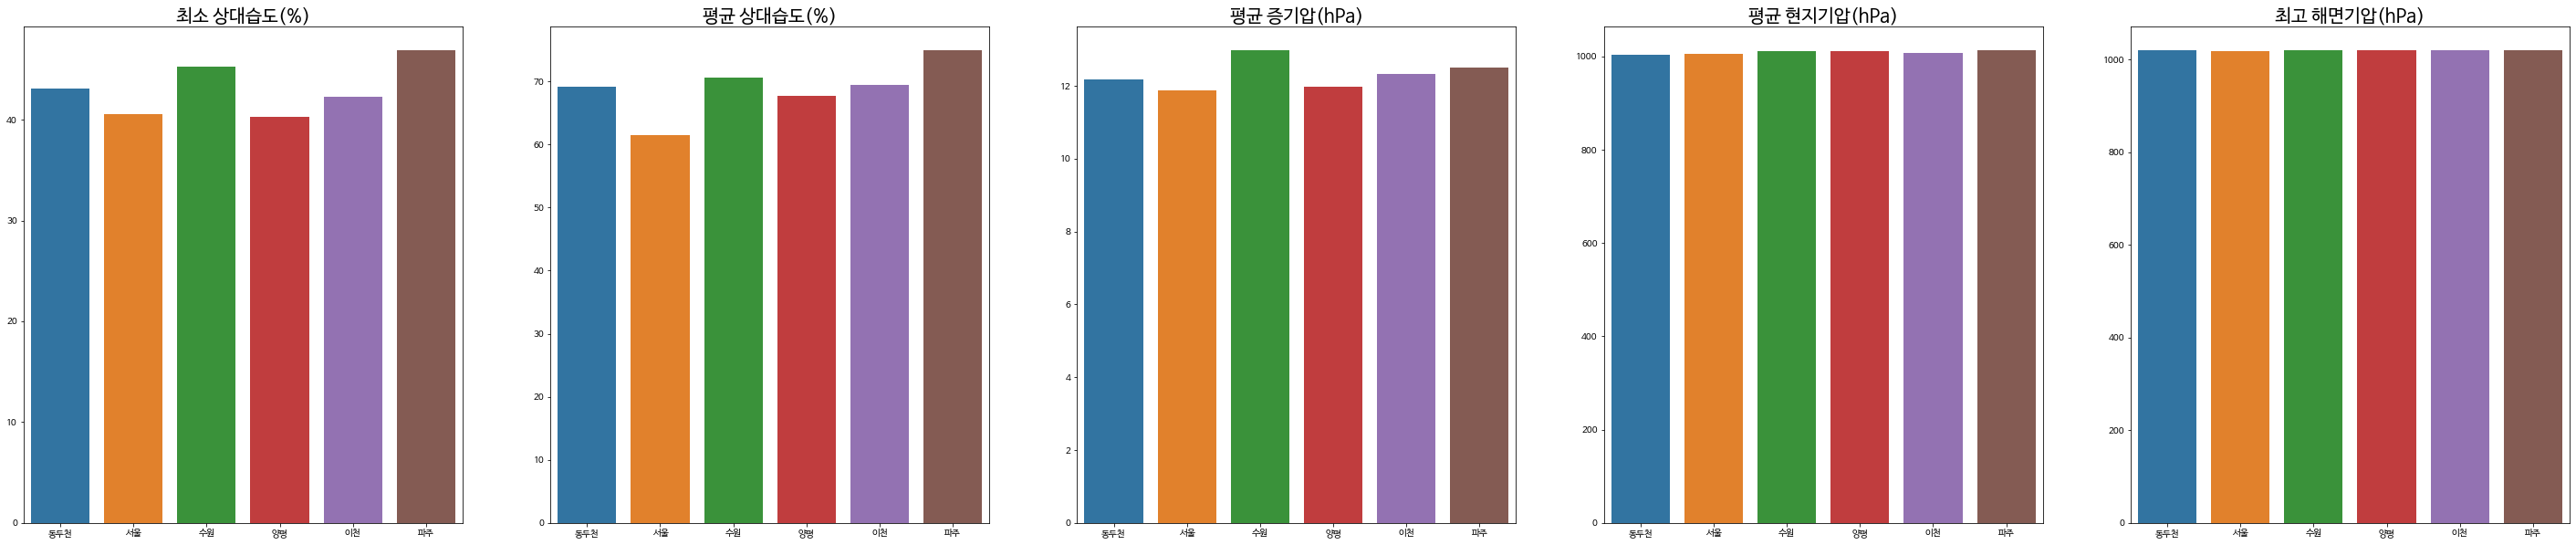

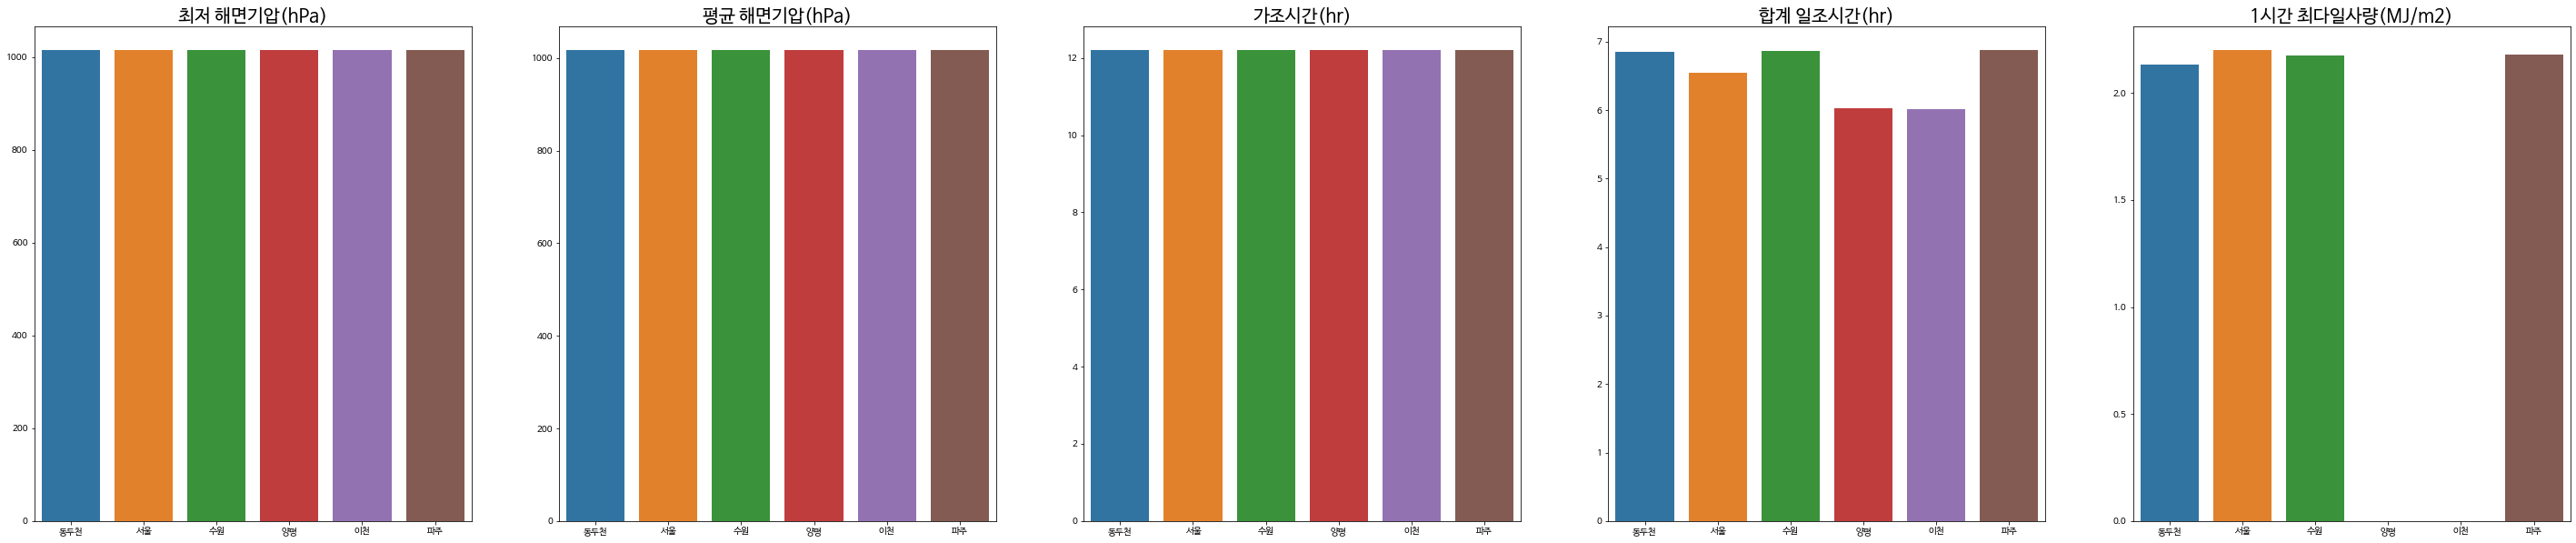

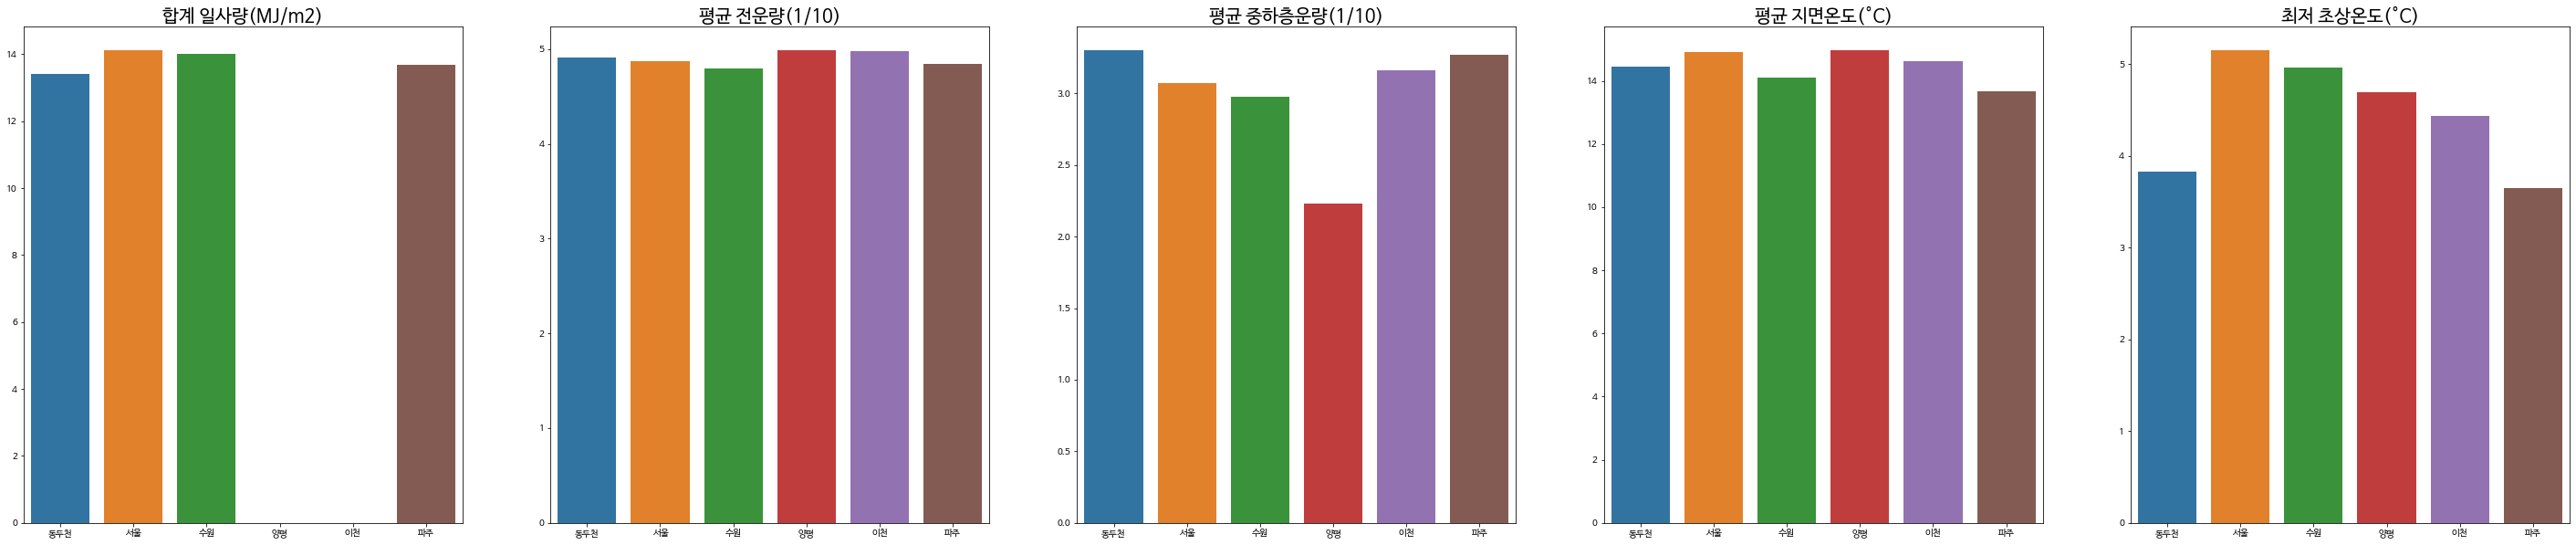

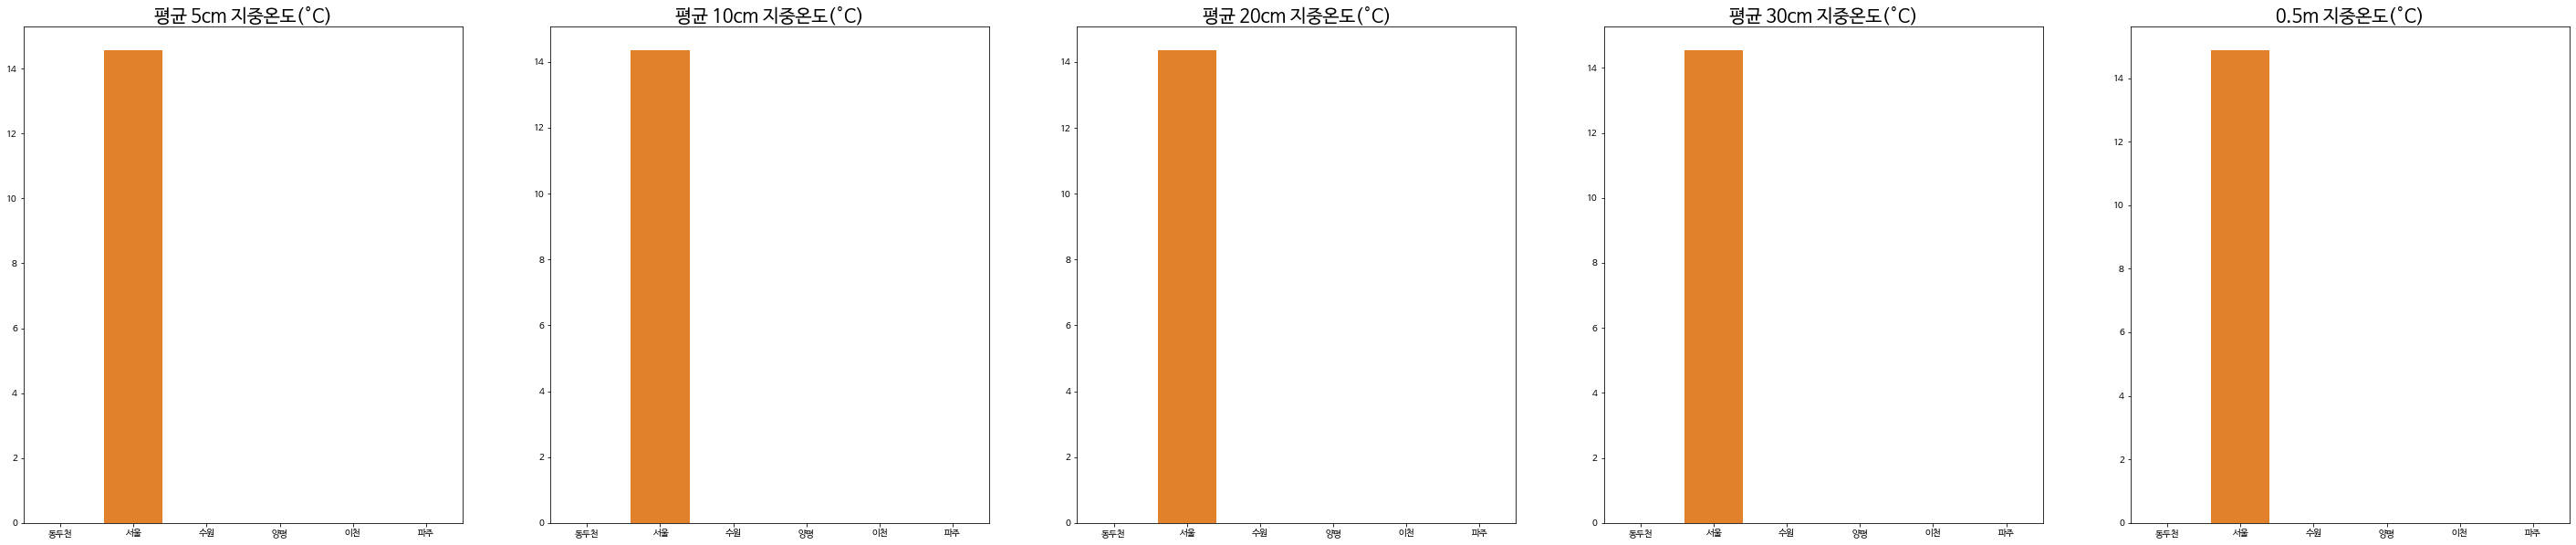

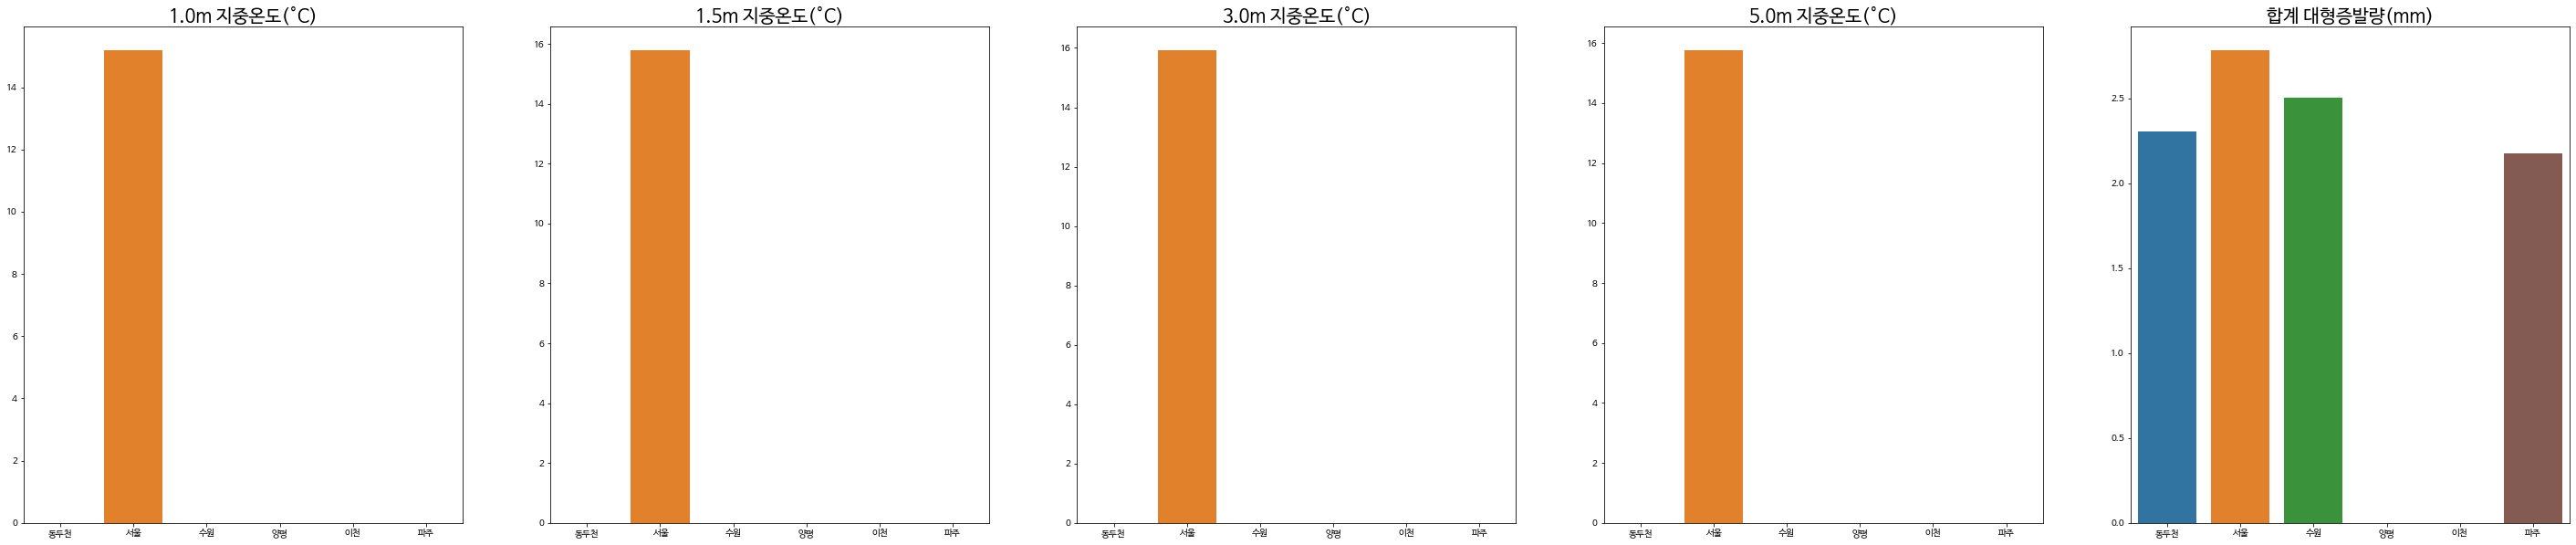

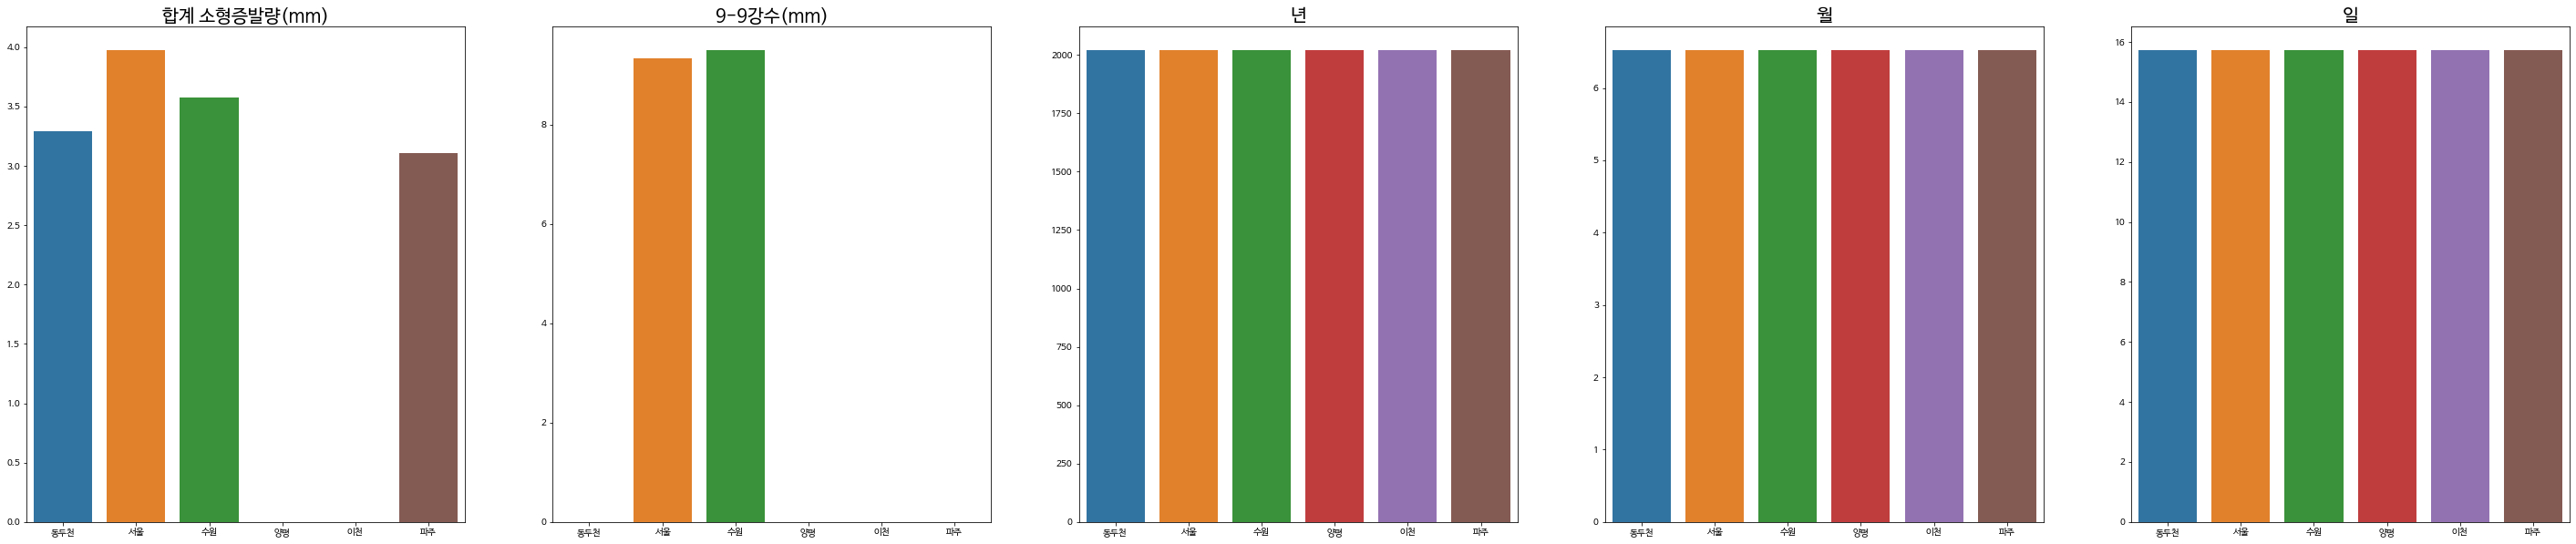

In [ ]:
point_plot(weather)

In [ ]:
# 년도별 컬럼별 분포
year_list = list(range(2018,2023))
def make_plot(df):
  for col in df.columns[3:]:
    if '시각' in col:
      continue
    plt.figure(figsize=(30,10))
    plt.subplots_adjust(hspace=0.5)

    for idx in range(len(year_list)):
      plot_df = df[df['년'] == year_list[idx]]
      plt.subplot(1,5,idx+1)
      sns.barplot(x = plot_df['월'] , y = plot_df.loc[:,col])
      plt.xlabel('')
      plt.ylabel('')
      plt.title(year_list[idx],size=15)
      plt.suptitle(col,size=20)
    plt.show()

In [ ]:
make_plot(weather)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
weather[weather[col_list[idx]].map(lambda x: datetime.strftime(x,'%Y-%m-%d %H:%M:%S')[-8:] != '00:00:00')]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,년,월,일
1380,98,동두천,2021-10-12,16.40,12.60,1900-01-01 23:34:00,22.40,1900-01-01 14:15:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,10,12
1381,98,동두천,2021-10-13,17.70,11.60,1900-01-01 06:54:00,24.90,1900-01-01 14:04:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,10,13
1382,98,동두천,2021-10-14,18.40,14.80,1900-01-01 05:08:00,24.20,1900-01-01 14:23:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,10,14
1383,98,동두천,2021-10-15,17.30,14.80,1900-01-01 05:21:00,22.10,1900-01-01 14:46:00,NaN,0.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,10,15
1384,98,동두천,2021-10-16,9.70,3.50,1900-01-01 23:20:00,16.10,1900-01-01 00:01:00,NaN,0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,10,16


In [ ]:
def time_plot(df):
  col_list = []
  for col in df.columns:
    if '시각' in col:
      col_list.append(col)

  plt.figure(figsize = (30,10))
  plt.subplots_adjust(hspace=0.5)

  for idx in range(len(col_list)):
      plot_df = df[df[col_list[idx]].map(lambda x: datetime.strftime(x,'%Y-%m-%d %H:%M:%S')[-8:] != '00:00:00')]
      plt.subplot(2,5,idx+1)
      sns.countplot(plot_df[col_list[idx]].map(lambda x: x.hour))
      plt.title(col_list[idx])

  plt.show()

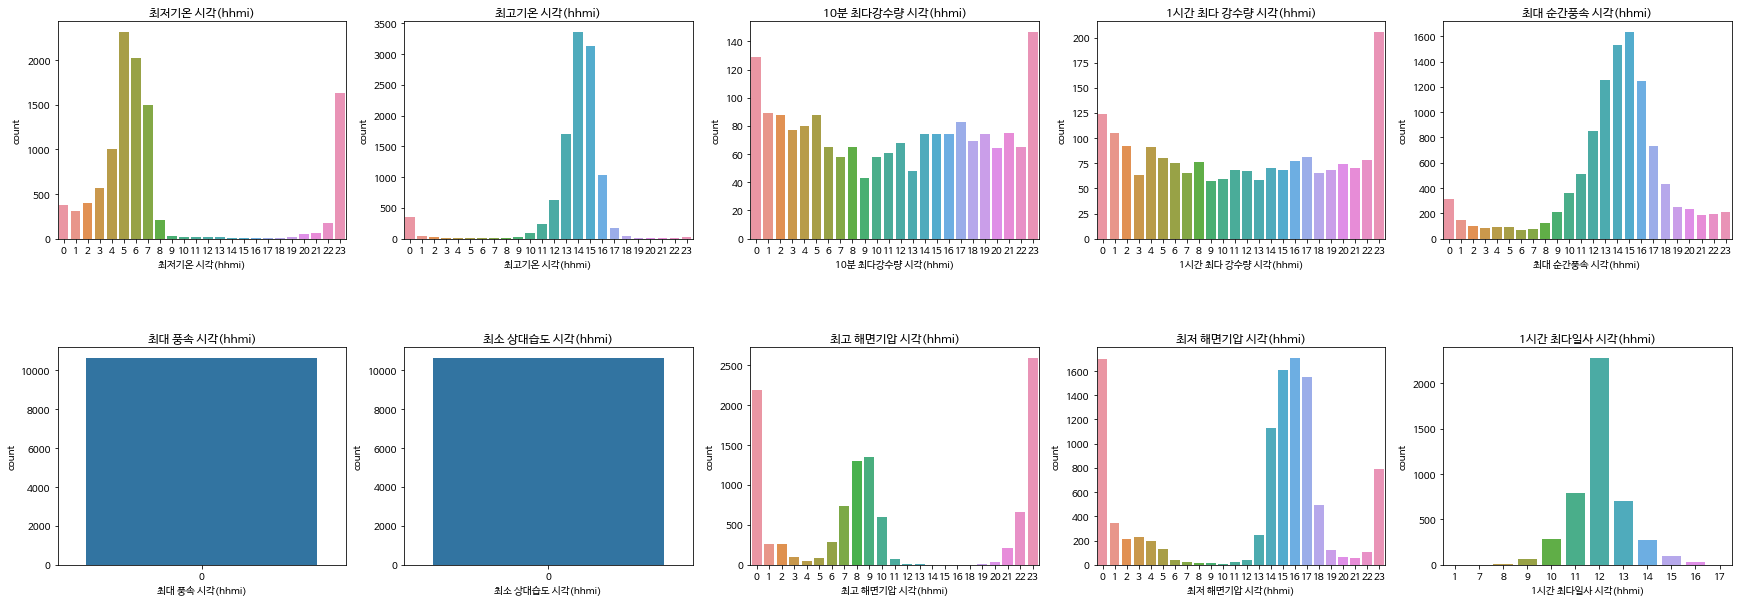

In [ ]:
time_plot(weather)

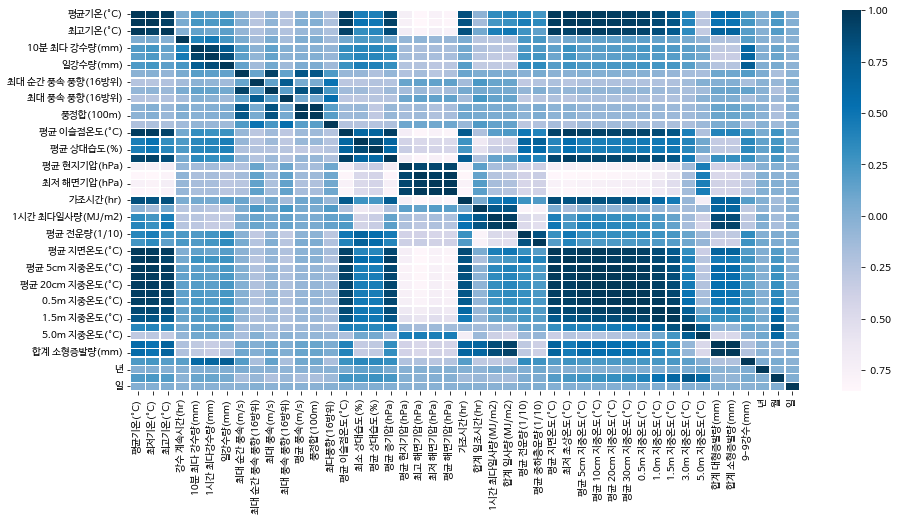

In [ ]:
corr = weather.iloc[:,3:].corr()

plt.figure(figsize=(15,7))
sns.heatmap(corr,
            # annot = True, 
            linewidths = 0.4, 
            linecolor = 'white', 
            fmt = '.1f', 
            cmap = plt.cm.PuBu) 

plt.show()